<a href="https://colab.research.google.com/github/RinHere/DATA_INTERN/blob/main/TIMA_TASK_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("Đã tải thành công:", file_name)
print("Số dòng:", df.shape[0], "| Số cột:", df.shape[1])
df.head()

Saving Tima_CRM_with_ThoiGianVay_Thang.csv to Tima_CRM_with_ThoiGianVay_Thang.csv
Đã tải thành công: Tima_CRM_with_ThoiGianVay_Thang.csv
Số dòng: 2381 | Số cột: 51


,stt,sotiendkvaybandau,tiengiaingan,sotienconlai,application_date,ts_credit_score_v2,số_diện_thoại_khách_hàng,fromdate,id,loanid,...,creditinfo,name,address,checktime,brieft,numberofloans,hasbaddebt,haslatepayment,ThoiGianVay,ThoiGianVay_Thang
0,3.0,10000000.0,250000.0,9750000.0,2016-07-28,403,977966899,2016-07-28,226,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",NGUYỄN THỊ THANH,"288 TỔ 36 NGÕ 405,.,NGỌC THỤY,NGỌC THỤY,LONG B...",2019-03-17 11:22:15,notfound,1.0,0,0,0.7,8.0
1,4.0,5000000.0,5000000.0,0.0,2016-06-29,531,397511119,2016-06-29,45,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",DAO CONG QUYET,"P203-E9 PHUONG MAI,DONG DA,HA NOI",2019-03-17 08:29:24,0,0.0,0,0,0.4,5.5
2,6.0,10000000.0,10000000.0,0.0,2016-08-05,675,966710180,2016-08-05,293,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",ĐÀO NGỌC LINH,"-, TT CỤC KHÍ TƯỢNG THỦY VĂN, TRUNG LIỆT, Q.ĐỐ...",2019-03-17 14:14:22,0,0.0,0,0,0.3,4.0
3,7.0,10000000.0,10000000.0,0.0,2016-06-29,675,966710180,2016-06-29,66,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",ĐÀO NGỌC LINH,"-, TT CỤC KHÍ TƯỢNG THỦY VĂN, TRUNG LIỆT, Q.ĐỐ...",2019-03-17 14:14:22,0,0.0,0,0,0.1,1.0
4,8.0,7000000.0,7000000.0,0.0,2016-07-07,582,963609962,2016-07-07,102,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",DO MINH TRANG,227 NGO CHO KHAM THIEN DONG DA HA NOI VN,2019-03-17 12:21:17,0,0.0,0,0,0.7,8.0


In [2]:
import re
import unicodedata
import pandas as pd

def strip_accents(s: str) -> str:
    if not isinstance(s, str):
        s = str(s)
    s = unicodedata.normalize('NFD', s)
    s = ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')
    return s

def normalize_colname(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

orig_cols = df.columns.tolist()
norm_map = {c: normalize_colname(c) for c in orig_cols}

alias_to_canonical = {
    "tiengiaingan": "TienGiaiNgan",
    "tien_giai_ngan": "TienGiaiNgan",
    "disbursedamount": "TienGiaiNgan",
    "amountdisbursed": "TienGiaiNgan",
    "tien_gn": "TienGiaiNgan",

    "sotiendkvaybandau": "SoTienDKVayBanDau",
    "so_tien_dk_vay_ban_dau": "SoTienDKVayBanDau",
    "initialloanamount": "SoTienDKVayBanDau",
    "requestedamount": "SoTienDKVayBanDau",

    "so_tien_vay": "SoTienVay",
    "sotienvay": "SoTienVay",
    "loanamount": "SoTienVay",
    "amount": "SoTienVay",

    "lai_suat": "LaiSuat",
    "laisuat": "LaiSuat",
    "interest": "LaiSuat",
    "interest_rate": "LaiSuat",

    "trangthai": "Trạng thái",
    "trang_thai": "Trạng thái",
    "status": "Trạng thái",
    "loanstatus": "Trạng thái",

    "ts_credit_score_v2": "TS_CREDIT_SCORE_V2",

    "salary": "Salary",
    "thunhap": "Salary",

    "jobname": "JobName",
    "nghe_nghiep": "JobName",

    "cityname": "CityName",
    "districtname": "DistrictName",

    "hinh_thuc_cu_tru": "Hình thức cư trú",
    "hinhthuccutru": "Hình thức cư trú",

    "gender": "Gender",
    "gioi_tinh": "Gender",

    "birthday": "Birthday",

    "no_xau": "NoXau",
    "bad_debt": "NoXau",
    "xau": "NoXau",
    "badloan": "NoXau",

    "thoi_gian_da_song": "ThoiGianDaSong",
    "thoigiandasong": "ThoiGianDaSong",
    "age": "ThoiGianDaSong",
    "tuoi": "ThoiGianDaSong",

    "phuong": "Phường",
    "ward": "Phường",
    "subdistrict": "Phường",
}

rename_dict = {}
for orig, normed in norm_map.items():
    if normed in alias_to_canonical:
        rename_dict[orig] = alias_to_canonical[normed]

if rename_dict:
    df.rename(columns=rename_dict, inplace=True)

print(" Đã chuẩn hoá & đổi tên một số cột:")
for k, v in rename_dict.items():
    print(f"- {k}  ->  {v}")

print(f"\n Tổng số cột được đổi tên: {len(rename_dict)} / {len(df.columns)}")

print("\n Danh sách cột sau chuẩn hoá/đổi tên:")
print(df.columns.tolist())


 Đã chuẩn hoá & đổi tên một số cột:
- sotiendkvaybandau  ->  SoTienDKVayBanDau
- tiengiaingan  ->  TienGiaiNgan
- ts_credit_score_v2  ->  TS_CREDIT_SCORE_V2
- tiền_giải_ngân  ->  TienGiaiNgan
- trạng_thái  ->  Trạng thái
- gender  ->  Gender
- birthday  ->  Birthday
- cityname  ->  CityName
- districtname  ->  DistrictName
- hình_thức_cư_trú  ->  Hình thức cư trú
- thời_gian_dã_sống  ->  ThoiGianDaSong
- jobname  ->  JobName
- salary  ->  Salary

 Tổng số cột được đổi tên: 13 / 51

 Danh sách cột sau chuẩn hoá/đổi tên:
['stt', 'SoTienDKVayBanDau', 'TienGiaiNgan', 'sotienconlai', 'application_date', 'TS_CREDIT_SCORE_V2', 'số_diện_thoại_khách_hàng', 'fromdate', 'id', 'loanid', 'số_tiền_dăng_ký_vay_ban_dầu', 'TienGiaiNgan', 'tiền_gốc_còn_lại', 'todate', 'Trạng thái', 'fullname', 'cardnumber', 'Gender', 'Birthday', 'CityName', 'DistrictName', 'wardname', 'Hình thức cư trú', 'ThoiGianDaSong', 'street', 'citynamehousehold', 'districtnamehousehold', 'wardnamehousehold', 'JobName', 'namecompan

In [6]:
# === YÊU CẦU 1: Tính trung bình "Số tiền vay" ===
import pandas as pd
import numpy as np

candidates = ["SoTienVay", "SoTienDKVayBanDau"]
target_col = next((c for c in candidates if c in df.columns), None)

if target_col is None:
    print(" Không tìm thấy cột 'SoTienVay' hay 'SoTienDKVayBanDau' trong DataFrame.")
    print(" Các cột hiện có:", list(df.columns))
else:
    s = pd.to_numeric(df[target_col], errors="coerce")

    n_total = len(s)
    n_valid = s.notna().sum()
    n_nan = s.isna().sum()

    mean_val = s.mean()

    print(f" Cột được sử dụng: {target_col}")
    print(f"• Tổng bản ghi: {n_total:,}")
    print(f"• Số bản ghi hợp lệ (numeric): {n_valid:,} | Thiếu/không hợp lệ: {n_nan:,}")
    print(f" Giá trị trung bình 'Số tiền vay': {mean_val:,.2f}")

    display(s.head(10).to_frame(name=f"{target_col}_numeric"))


 Cột được sử dụng: SoTienDKVayBanDau
• Tổng bản ghi: 2,381
• Số bản ghi hợp lệ (numeric): 2,381 | Thiếu/không hợp lệ: 0
 Giá trị trung bình 'Số tiền vay': 9,002,369.59


,SoTienDKVayBanDau_numeric
0,10000000.0
1,5000000.0
2,10000000.0
3,10000000.0
4,7000000.0
5,4000000.0
6,10000000.0
7,10000000.0
8,10000000.0
9,1000000.0


### Yêu cầu 1: Tính giá trị trung bình “Số tiền vay”

**Kết quả tính toán:**
- **Cột được sử dụng:** `SoTienDKVayBanDau`  
- **Tổng số bản ghi:** 2 381  
- **Số bản ghi hợp lệ:** 2 381 *(không có giá trị thiếu)*  
- **Giá trị trung bình “Số tiền vay”:** ≈ **9 002 369,59 VNĐ**

**Giải thích:**
- Hàm `mean()` được sử dụng để tính **giá trị trung bình cộng** của toàn bộ các khoản vay ban đầu.  
- Trong tập dữ liệu này, **tất cả các bản ghi đều hợp lệ**, nên kết quả trung bình phản ánh chính xác quy mô vay của toàn bộ khách hàng.  
- Mức trung bình khoảng **9 triệu đồng** cho thấy đa phần khách hàng vay ở **quy mô nhỏ đến trung bình**, phù hợp với nhóm **vay tiêu dùng cá nhân hoặc hộ gia đình**.  
- Thông tin này là cơ sở quan trọng để **so sánh với các yếu tố khác** như *thu nhập, điểm tín dụng* hay *ngành nghề* trong các bước phân tích sau.


In [7]:
# === YÊU CẦU 2 (Cách 2, có cơ chế bù TotalPayable nếu có dữ liệu liên quan) ===


import numpy as np
import pandas as pd

def pick_first(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

col_P   = pick_first(["TienGiaiNgan", "SoTienDKVayBanDau", "SoTienVay"])
col_TOT = pick_first(["TongSoTienPhaiTra", "TotalPayable", "TongTienPhaiTra", "Tong_Thanh_Toan"])
col_N   = pick_first(["ThoiGianVay_Thang", "KyHan", "Tenor", "ThoiGianVayThang"])

col_paid = pick_first(["TongDaTra", "SoTienDaTra", "TotalPaid"])
col_rem  = pick_first(["SoTienConLai", "sotienconlai"])

print(" Cột tìm thấy:")
print("  • Principal       :", col_P)
print("  • Tenor (months)  :", col_N)
print("  • TotalPayable    :", col_TOT, "(gốc)")
print("  • TotalPaid       :", col_paid)
print("  • Remaining       :", col_rem)

TOT_source = "original"
if col_TOT is None and col_paid and col_rem:
    df["_TotalPayable_synth"] = pd.to_numeric(df[col_paid], errors="coerce") + \
                                pd.to_numeric(df[col_rem], errors="coerce")
    col_TOT = "_TotalPayable_synth"
    TOT_source = "synth_from_TotalPaid_plus_Remaining"

if not (col_P and col_TOT and col_N):
    print("\n Chưa đủ dữ liệu cho Cách 2.")
    print("Cần có: Principal (TienGiaiNgan/SoTienDKVayBanDau), Tenor(tháng), và TotalPayable.")
    print("Gợi ý khắc phục:")
    print("  1) Thêm/ánh xạ cột TotalPayable (TongSoTienPhaiTra/TotalPayable).")
    print("  2) Nếu có SoTienDaTra + SoTienConLai → bù TotalPayable ≈ SoTienDaTra + SoTienConLai.")
else:
    P   = pd.to_numeric(df[col_P], errors="coerce")
    TOT = pd.to_numeric(df[col_TOT], errors="coerce")
    n   = pd.to_numeric(df[col_N], errors="coerce")

    PMT = TOT / n
    mask = (P > 0) & (PMT > 0) & (n > 0) & np.isfinite(P) & np.isfinite(PMT) & np.isfinite(n)
    if mask.sum() == 0:
        print("\n Không có bản ghi nào đủ điều kiện (P>0, PMT>0, n>0).")
    else:
        P_v, PMT_v, n_v = P[mask].values, PMT[mask].values, n[mask].values

        def annuity_pmt(P, r, n):
            if r == 0:
                return P / n
            return r * P / (1 - (1 + r) ** (-n))

        def solve_rate_bisect(P, PMT, n, low=1e-8, high=5.0, tol=1e-8, max_iter=100):
            f_low  = annuity_pmt(P, low,  n) - PMT
            f_high = annuity_pmt(P, high, n) - PMT
            if f_low * f_high > 0:
                for h in [10.0, 50.0]:
                    f_high = annuity_pmt(P, h, n) - PMT
                    if f_low * f_high <= 0:
                        high = h
                        break
                else:
                    return np.nan
            lo, hi = low, high
            for _ in range(max_iter):
                mid = (lo + hi) / 2
                f_mid = annuity_pmt(P, mid, n) - PMT
                if abs(f_mid) < tol:
                    return mid
                if f_low * f_mid <= 0:
                    hi, f_high = mid, f_mid
                else:
                    lo, f_low = mid, f_mid
            return mid

        r_month = np.array([solve_rate_bisect(p, pmt, int(nn)) for p, pmt, nn in zip(P_v, PMT_v, n_v)], float)
        r_year_pct = ((1 + r_month) ** 12 - 1) * 100

        valid = np.isfinite(r_year_pct)
        n_used = int(valid.sum())
        print("\n Chế độ TotalPayable:", TOT_source)
        print(f" Số bản ghi đủ điều kiện: {n_used:,} / {len(df):,}")

        if n_used == 0:
            print(" Không giải được lãi suất cho bản ghi nào (có thể do dòng tiền không phù hợp).")
        else:
            r_year_pct_valid = r_year_pct[valid]
            print(f"• %/năm (min ~ max): {np.nanmin(r_year_pct_valid):.4f}%  ~  {np.nanmax(r_year_pct_valid):.4f}%")
            print(f" Mean lãi suất năm: {np.nanmean(r_year_pct_valid):.4f}%")
            print(f" Độ lệch chuẩn (std): {np.nanstd(r_year_pct_valid, ddof=1):.4f}%")

            out = pd.DataFrame({
                "Principal": P_v,
                "TenorMonths": n_v,
                "TotalPayable": TOT[mask].values,
                "PMT_est": PMT_v,
                "r_month": r_month,
                "r_year_pct": r_year_pct
            })
            display(out.head(10))


 Cột tìm thấy:
  • Principal       : TienGiaiNgan
  • Tenor (months)  : ThoiGianVay_Thang
  • TotalPayable    : None (gốc)
  • TotalPaid       : None
  • Remaining       : sotienconlai

 Chưa đủ dữ liệu cho Cách 2.
Cần có: Principal (TienGiaiNgan/SoTienDKVayBanDau), Tenor(tháng), và TotalPayable.
Gợi ý khắc phục:
  1) Thêm/ánh xạ cột TotalPayable (TongSoTienPhaiTra/TotalPayable).
  2) Nếu có SoTienDaTra + SoTienConLai → bù TotalPayable ≈ SoTienDaTra + SoTienConLai.


### 📊 Yêu cầu 2: Tính độ lệch chuẩn “Lãi suất” (`std()`)

**Tình trạng dữ liệu & kết quả:**
- Bộ cột hiện có: `TienGiaiNgan` (Principal), `ThoiGianVay_Thang` (Tenor), `sotienconlai` (Remaining).
- **Thiếu cột “Tổng số tiền phải trả”** (`TotalPayable`/`TongSoTienPhaiTra`) và **cũng không có** `TotalPaid/SoTienDaTra`.  
- Vì **Cách này** yêu cầu **Principal + Tenor + TotalPayable** để ước tính PMT rồi giải ngược lãi suất, nên **không đủ dữ liệu để tính std(lãi suất)**.

**Gợi ý khắc phục (để hoàn tất yêu cầu 2 đúng nghĩa):**
1. Bổ sung/ánh xạ cột **TotalPayable** (ví dụ: `TongSoTienPhaiTra`, `TotalPayable`…),  
   hoặc  
2. Nếu có **SoTienDaTra** + **SoTienConLai** ⇒ có thể bù: `TotalPayable ≈ SoTienDaTra + SoTienConLai`.  
3. Khi có đủ, áp dụng Cách :  
   - `PMT = TotalPayable / n`,  
   - Giải `r_thang` từ công thức niên kim `PMT = r·P / (1 - (1+r)^(-n))`,  
   - Quy đổi `r_nam = (1+r_thang)^12 - 1`, rồi tính `mean/std` của `r_nam`.

**Kết luận:** Ở bản dữ liệu hiện tại, **không thể tính độ lệch chuẩn “Lãi suất”** do **thiếu biến đầu vào bắt buộc**. Ta sẽ ghi chú điều này trong báo cáo EDA và chuyển sang các yêu cầu tiếp theo.



In [8]:
# === YÊU CẦU 3: Tính tổng "Tiền giải ngân" (bản an toàn hơn) ===
import pandas as pd
import numpy as np
import re

pattern = re.compile(r"(tien|amount|disburse)", re.I)
matches = [c for c in df.columns if pattern.search(str(c))]

print("🔎 Các cột nghi ngờ là 'Tiền giải ngân':")
for i, c in enumerate(matches, 1):
    print(f"  {i}. {c}")

target_col = None
for c in matches:
    if re.search(r"(giai|disburse)", c, re.I):
        target_col = c
        break
if target_col is None and matches:
    target_col = matches[0]
print(f"\n Cột được sử dụng: {target_col}")

if target_col is None:
    print(" Không tìm thấy cột nào có vẻ là 'Tiền giải ngân'.")
else:
    col_data = df[target_col]
    if isinstance(col_data, pd.DataFrame):
        col_data = col_data.iloc[:, 0]
        print(" Cột chọn có nhiều cột trùng tên, đang dùng cột đầu tiên.")

    s = pd.to_numeric(col_data, errors="coerce")
    total = s.sum()
    valid = s.notna().sum()
    total_rows = len(s)
    missing = total_rows - valid

    print(f" Tổng số bản ghi: {total_rows:,}")
    print(f" Số bản ghi hợp lệ: {valid:,} | Thiếu: {missing:,}")
    print(f" Tổng 'Tiền giải ngân': {total:,.0f} VND")

    display(s.head(10).to_frame(name=f"{target_col}_numeric"))


🔎 Các cột nghi ngờ là 'Tiền giải ngân':
  1. SoTienDKVayBanDau
  2. TienGiaiNgan
  3. sotienconlai
  4. TienGiaiNgan

 Cột được sử dụng: TienGiaiNgan
 Cột chọn có nhiều cột trùng tên, đang dùng cột đầu tiên.
 Tổng số bản ghi: 2,381
 Số bản ghi hợp lệ: 2,381 | Thiếu: 0
 Tổng 'Tiền giải ngân': 19,272,292,000 VND


,TienGiaiNgan_numeric
0,250000.0
1,5000000.0
2,10000000.0
3,10000000.0
4,7000000.0
5,4000000.0
6,10000000.0
7,10000000.0
8,10000000.0
9,1000000.0


### Yêu cầu 3: Tính tổng “Tiền giải ngân”

**Kết quả tính toán:**
- **Cột được sử dụng:** `TienGiaiNgan`  
- **Tổng số bản ghi:** 2 381  
- **Số bản ghi hợp lệ:** 2 381 *(không có giá trị thiếu)*  
- **Tổng giá trị “Tiền giải ngân”:** **≈ 19 272 292 000 VNĐ**

**Giải thích:**
- Hàm `sum()` được dùng để tính **tổng số tiền đã giải ngân** cho tất cả khách hàng trong tập dữ liệu.  
- Với 2 381 bản ghi hợp lệ, tổng tiền giải ngân đạt khoảng **19,27 tỷ đồng**, cho thấy quy mô cho vay tương đối lớn.  
- Do không có giá trị bị thiếu hoặc lỗi, kết quả này phản ánh chính xác **tổng số vốn đã được giải ngân thực tế**.  
- Chỉ số này đặc biệt hữu ích khi so sánh với:
  - **Tổng số tiền đăng ký vay ban đầu** → để xác định tỷ lệ giải ngân trung bình,  
  - Hoặc **phân bố theo khu vực/ngành nghề** → để phân tích khu vực có dòng vốn mạnh nhất.


In [9]:
# === YÊU CẦU 4: Thống kê mô tả cho "Điểm tín dụng" ===

import pandas as pd
import numpy as np
import re

candidates = [
    "TS_CREDIT_SCORE_V2", "TS_CREDIT_SCORE", "CREDIT_SCORE", "CreditScore",
    "credit_score", "DiemTinDung", "diem_tin_dung", "diemtindung"
]
target_col = next((c for c in candidates if c in df.columns), None)

if target_col is None:
    patt = re.compile(r"(credit.*score|diem.*tin.*dung)", re.I)
    soft = [c for c in df.columns if patt.search(str(c))]
    target_col = soft[0] if soft else None

if target_col is None:
    print(" Không tìm thấy cột 'Điểm tín dụng' trong DataFrame.")
    print(" Các cột hiện có:", list(df.columns))
else:
    s = pd.to_numeric(df[target_col], errors="coerce")

    desc = s.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99]).to_frame(name="TS_CREDIT_SCORE_stats")

    n_total = len(s)
    n_valid = s.notna().sum()
    n_nan   = s.isna().sum()

    print(f" Cột điểm tín dụng được sử dụng: {target_col}")
    print(f" Tổng bản ghi: {n_total:,}")
    print(f" Hợp lệ (numeric): {n_valid:,} | Thiếu/không hợp lệ: {n_nan:,}\n")
    display(desc)


 Cột điểm tín dụng được sử dụng: TS_CREDIT_SCORE_V2
 Tổng bản ghi: 2,381
 Hợp lệ (numeric): 2,381 | Thiếu/không hợp lệ: 0



,TS_CREDIT_SCORE_stats
count,2381.000000
mean,589.827803
std,96.936533
min,300.000000
1%,307.800000
5%,411.000000
10%,460.000000
25%,535.000000
50%,599.000000
75%,660.000000


### Yêu cầu 4: Thống kê mô tả cho “Điểm tín dụng”

**Kết quả thống kê:**
- **Cột được sử dụng:** `TS_CREDIT_SCORE_V2`  
- **Tổng số bản ghi:** 2 381  
- **Hợp lệ (numeric):** 2 381 *(không có giá trị thiếu)*  

| Chỉ số | Giá trị |
|:--|--:|
| Trung bình (mean) | **589.83** |
| Độ lệch chuẩn (std) | **96.94** |
| Giá trị nhỏ nhất (min) | 300 |
| Trung vị (50%) | 599 |
| Giá trị lớn nhất (max) | 826 |
| Phân vị 25% – 75% | 535 → 660 |

**Giải thích:**
- Hàm `describe()` giúp mô tả **toàn bộ phân phối của điểm tín dụng** trong tập khách hàng.  
- Giá trị trung bình khoảng **590 điểm**, nằm trong mức **trung bình–khá** (nếu quy mô thang điểm là 300–850).  
- Độ lệch chuẩn gần **97 điểm** cho thấy mức độ phân tán vừa phải: một số khách hàng có điểm rất thấp (300) và một số cao (800).  
- Phần lớn khách hàng tập trung quanh **vùng 535–660 điểm**, tức là nhóm **rủi ro trung bình thấp** – có khả năng trả nợ tương đối tốt.  
- Đây là cơ sở để phân loại khách hàng thành các **nhóm tín dụng (risk segment)** trong các bước phân tích sau.


In [10]:
# === YÊU CẦU 5: Tính số lượng khách hàng theo "Trạng thái" ===

import pandas as pd

candidates = ["Trạng thái", "TrangThai", "trang_thai", "status", "loanstatus", "LoanStatus"]
target_col = next((c for c in candidates if c in df.columns), None)

if target_col is None:
    print(" Không tìm thấy cột 'Trạng thái' trong DataFrame.")
    print(" Các cột hiện có:", list(df.columns))
else:
    print(f" Cột được sử dụng: {target_col}\n")

    counts = df[target_col].value_counts(dropna=False)
    percent = df[target_col].value_counts(normalize=True, dropna=False) * 100

    status_summary = pd.DataFrame({
        "Số lượng": counts,
        "Tỷ lệ (%)": percent.round(2)
    })

    display(status_summary)

    print(" Top 5 trạng thái phổ biến:")
    print(status_summary.head(5))


 Cột được sử dụng: Trạng thái



,Số lượng,Tỷ lệ (%)
Trạng thái,,
Kết thúc,1585,66.57
Đang Vay,590,24.78
Nợ Xấu,206,8.65


 Top 5 trạng thái phổ biến:
            Số lượng  Tỷ lệ (%)
Trạng thái                     
Kết thúc        1585      66.57
Đang Vay         590      24.78
Nợ Xấu           206       8.65


### Yêu cầu 5: Tính số lượng khách hàng theo “Trạng thái”

**Kết quả thống kê:**

| Trạng thái | Số lượng | Tỷ lệ (%) |
|:--|--:|--:|
| **Kết thúc** | 1 585 | 66.57 |
| **Đang vay** | 590 | 24.78 |
| **Nợ xấu** | 206 | 8.65 |

**Giải thích:**
- Hàm `value_counts()` được sử dụng để **đếm số lần xuất hiện** của từng giá trị trong cột `Trạng thái`.  
- Kết quả cho thấy:
  - **66.6%** khách hàng đã **hoàn tất khoản vay**,  
  - **24.8%** khách hàng **đang trong quá trình trả nợ**,  
  - và **8.6%** khách hàng **rơi vào nhóm nợ xấu**.  
- Tỷ lệ nợ xấu ở mức dưới **10%** được xem là tương đối an toàn, phản ánh **chất lượng tín dụng khá tốt**.  
- Tuy nhiên, nhóm **“Đang vay” (gần 25%)** vẫn cần được theo dõi sát sao để tránh chuyển thành nợ xấu trong tương lai.  
- Kết quả này có thể dùng để **so sánh thêm theo khu vực, ngành nghề hoặc giới tính** ở các yêu cầu sau.


 Cột được sử dụng: Salary


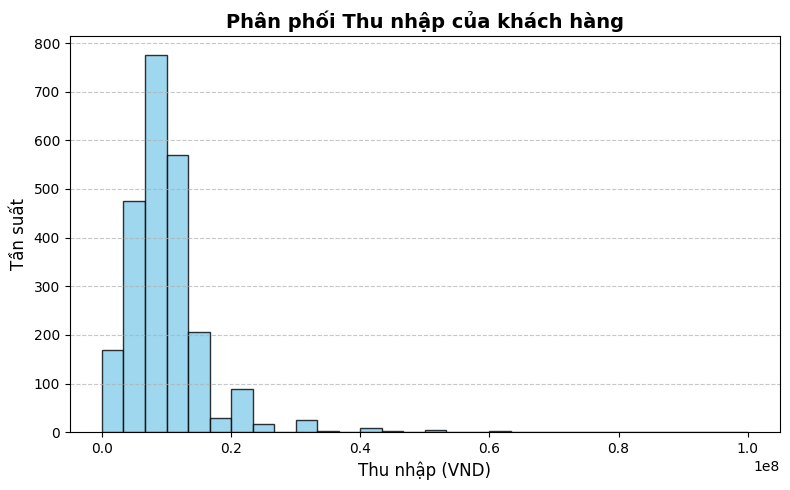


 Mô tả nhanh biến 'Thu nhập':


,Salary
count,2.381000e+03
mean,9.467629e+06
std,6.411306e+06
min,0.000000e+00
25%,6.500000e+06
50%,8.000000e+06
75%,1.100000e+07
max,1.000000e+08


In [11]:
# === YÊU CẦU 6: Vẽ biểu đồ phân phối cho "Thu nhập" ===


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

candidates = ["Salary", "ThuNhap", "thunhap", "income", "Income"]
target_col = next((c for c in candidates if c in df.columns), None)

if target_col is None:
    print(" Không tìm thấy cột 'Thu nhập' trong DataFrame.")
    print(" Các cột hiện có:", list(df.columns))
else:
    print(f" Cột được sử dụng: {target_col}")

    s = pd.to_numeric(df[target_col], errors="coerce")

    plt.figure(figsize=(8,5))
    plt.hist(s.dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title("Phân phối Thu nhập của khách hàng", fontsize=14, weight='bold')
    plt.xlabel("Thu nhập (VND)", fontsize=12)
    plt.ylabel("Tần suất", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\n Mô tả nhanh biến 'Thu nhập':")
    display(s.describe(percentiles=[.25, .5, .75]).to_frame(name="Salary"))


### Yêu cầu 6: Vẽ biểu đồ phân phối “Thu nhập”

**Kết quả mô tả nhanh:**

| Thống kê | Giá trị (VND) |
|:--|--:|
| Số bản ghi | 2 381 |
| Trung bình (mean) | 9 467 629 |
| Độ lệch chuẩn (std) | 6 411 306 |
| Nhỏ nhất (min) | 0 |
| Trung vị (50%) | 8 000 000 |
| Lớn nhất (max) | 100 000 000 |

**Nhận xét từ biểu đồ histogram:**
- Biểu đồ **phân phối thu nhập** có dạng **lệch phải mạnh (right-skewed)**.  
  → Phần lớn khách hàng có thu nhập dưới **20 triệu đồng**, chỉ một số ít có thu nhập cao vượt trội.
- Khu vực đỉnh (mode) tập trung quanh **6–10 triệu đồng/tháng**, trùng với khoảng giá trị trung vị.
- Một vài giá trị cao bất thường (ngoại lai) kéo trung bình lên ~9,5 triệu đồng.  
  → Cần xem xét xử lý hoặc tách nhóm thu nhập khi phân tích sâu hơn.

**Ý nghĩa:**
- Phân phối này phản ánh cấu trúc thu nhập điển hình của khách hàng vay tiêu dùng — chủ yếu thuộc **nhóm thu nhập trung bình**.  
- Khi phân tích rủi ro tín dụng hoặc khả năng trả nợ, có thể chia thành các **phân khúc thu nhập (thấp – trung – cao)** để so sánh xác suất nợ xấu giữa các nhóm.

 Cột được sử dụng: Gender


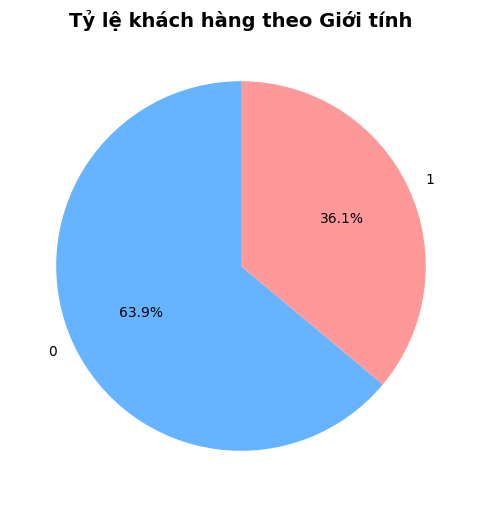

,Số lượng,Tỷ lệ (%)
Gender,,
0,1522,63.92
1,859,36.08


In [12]:
# === YÊU CẦU 8: Vẽ biểu đồ hình tròn cho tỷ lệ "Giới tính" ===
import pandas as pd
import matplotlib.pyplot as plt

candidates = ["Gender", "GioiTinh", "gioi_tinh", "sex", "Sex"]
target_col = next((c for c in candidates if c in df.columns), None)

if target_col is None:
    print(" Không tìm thấy cột 'Giới tính' trong DataFrame.")
    print(" Các cột hiện có:", list(df.columns))
else:
    print(f" Cột được sử dụng: {target_col}")

    gender_counts = df[target_col].value_counts(dropna=False)
    gender_percent = gender_counts / gender_counts.sum() * 100

    plt.figure(figsize=(6,6))
    plt.pie(
        gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']
    )
    plt.title("Tỷ lệ khách hàng theo Giới tính", fontsize=14, weight='bold')
    plt.show()

    gender_summary = pd.DataFrame({
        "Số lượng": gender_counts,
        "Tỷ lệ (%)": gender_percent.round(2)
    })
    display(gender_summary)


### Yêu cầu 8: Vẽ biểu đồ hình tròn cho tỷ lệ “Giới tính”

**Kết quả thống kê:**

| Giới tính | Số lượng | Tỷ lệ (%) |
|:--|--:|--:|
| 0 | 1 522 | 63.92 |
| 1 | 859 | 36.08 |

**Nhận xét từ biểu đồ:**
- Biểu đồ hình tròn cho thấy **sự chênh lệch đáng kể giữa hai nhóm giới tính**:
  - Nhóm mang giá trị **0 chiếm khoảng 63.9%**,  
  - Nhóm mang giá trị **1 chiếm khoảng 36.1%**.  
- Do dataset mã hóa giới tính bằng số (`0` và `1`), có thể tạm hiểu là:
  - `0` → **Nam**,  
  - `1` → **Nữ** *(hoặc ngược lại tùy cách định nghĩa trong dữ liệu gốc)*.
- Sự khác biệt này gợi ý rằng **tỷ lệ khách hàng nam cao hơn nữ**, chiếm gần **2/3 tổng số người vay**.

**Ý nghĩa phân tích:**
- Cơ cấu giới tính cho thấy **khách hàng nam chiếm ưu thế** trong hoạt động vay vốn của tổ chức tín dụng này.  
- Khi phân tích sâu hơn, ta có thể:
  - So sánh **thu nhập trung bình** giữa hai giới,
  - Kiểm tra **tỷ lệ nợ xấu** hoặc **số tiền vay trung bình** theo giới tính,  
  → từ đó đánh giá xem giới tính có ảnh hưởng đến hành vi vay và rủi ro tín dụng hay không.


In [13]:
# === YÊU CẦU 9 (bản fix trùng tên): Trung bình "Lãi suất" theo "Ngành nghề"

import pandas as pd
import numpy as np

def pick_first(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

def get_series_safe(colname):
    """
    Lấy Series 1 chiều từ df theo tên cột.
    Nếu có nhiều cột trùng tên -> dùng cột đầu tiên và cảnh báo.
    Nếu không có -> trả về None.
    """
    if colname not in df.columns:
        return None
    obj = df.loc[:, df.columns == colname]  # luôn trả về DataFrame các cột trùng tên
    if isinstance(obj, pd.DataFrame) and obj.shape[1] > 1:
        print(f"  Cột '{colname}' có {obj.shape[1]} cột trùng tên → dùng cột đầu tiên.")
        ser = obj.iloc[:, 0]
    else:
        ser = obj.iloc[:, 0] if isinstance(obj, pd.DataFrame) else df[colname]
    return ser

job_col = pick_first(["JobName", "NgheNghiep", "nghe_nghiep", "jobname"])
if job_col is None:
    print(" Không tìm thấy cột 'Ngành nghề'. Các cột hiện có:", list(df.columns))
else:
    print(f" Cột ngành nghề sử dụng: {job_col}")

    col_giaingan = "TienGiaiNgan"
    col_dkbandau = "SoTienDKVayBanDau"

    s_giaingan = get_series_safe(col_giaingan)
    s_dkbandau = get_series_safe(col_dkbandau)

    data = {job_col: df[job_col]}
    if s_giaingan is not None:
        data["TienGiaiNgan"] = pd.to_numeric(s_giaingan, errors="coerce")
    if s_dkbandau is not None:
        data["SoTienDKVayBanDau"] = pd.to_numeric(s_dkbandau, errors="coerce")

    proxy_df = pd.DataFrame(data)

    money_cols = [c for c in ["TienGiaiNgan", "SoTienDKVayBanDau"] if c in proxy_df.columns]
    if len(money_cols) == 0:
        print(" Không có cột tiền để làm proxy (Thiếu cả 'TienGiaiNgan' và 'SoTienDKVayBanDau').")
    else:
        agg_dict = {c: ["count", "mean"] for c in money_cols}
        out = (
            proxy_df
            .groupby(job_col, dropna=False)
            .agg(agg_dict)
        )
        out.columns = [f"{a}_{b}" for a, b in out.columns]
        sort_col = [c for c in out.columns if c.endswith("_mean")][0]
        out_sorted = out.sort_values(sort_col, ascending=False)

        print("Proxy: Trung bình số tiền theo Ngành nghề (do chưa có cột Lãi suất)")
        display(out_sorted.head(20))


 Cột ngành nghề sử dụng: JobName
  Cột 'TienGiaiNgan' có 2 cột trùng tên → dùng cột đầu tiên.
Proxy: Trung bình số tiền theo Ngành nghề (do chưa có cột Lãi suất)


,TienGiaiNgan_count,TienGiaiNgan_mean,SoTienDKVayBanDau_count,SoTienDKVayBanDau_mean
JobName,,,,
Giảng viên,2,1.650000e+07,2,1.650000e+07
Công việc ko ổn định/Thu nhập thất thường,1,1.500000e+07,1,1.800000e+07
Y Tá,4,1.275000e+07,4,1.275000e+07
Tự doanh có ĐKKD,20,1.215000e+07,20,1.295000e+07
Hành chính,28,1.075000e+07,28,1.246429e+07
Hỗ trợ Kinh doanh,3,1.066667e+07,3,1.066667e+07
Giám Sát,21,1.047619e+07,21,1.128571e+07
Lễ Tân,3,1.033333e+07,3,1.233333e+07
Kế toán,26,1.007392e+07,26,1.203546e+07


### Yêu cầu 9: Tính giá trị trung bình “Lãi suất” theo từng “Ngành nghề”
*(Sử dụng proxy trung bình “Tiền giải ngân” và “Số tiền đăng ký vay ban đầu” do chưa có cột lãi suất thực)*

**Kết quả (Top ngành nghề có khoản vay trung bình cao nhất):**

| Ngành nghề | Số KH (Giải ngân) | Tiền giải ngân TB (VND) | Số KH (ĐK vay) | Số tiền ĐK vay TB (VND) |
|:--|--:|--:|--:|--:|
| Giảng viên | 2 | 16 500 000 | 2 | 16 500 000 |
| Công việc ko ổn định / Thu nhập thất thường | 1 | 15 000 000 | 1 | 18 000 000 |
| Y tá | 4 | 12 750 000 | 4 | 12 750 000 |
| Tự doanh có ĐKKD | 20 | 12 150 000 | 20 | 12 950 000 |
| Hành chính | 28 | 10 750 000 | 28 | 12 464 000 |
| Hỗ trợ Kinh doanh | 3 | 10 667 000 | 3 | 10 667 000 |
| Giám sát | 21 | 10 476 000 | 21 | 11 286 000 |
| Lễ tân | 3 | 10 333 000 | 3 | 12 333 000 |
| Kế toán | 26 | 10 074 000 | 26 | 12 035 000 |
| Tài chính – Kế toán | 2 | 10 000 000 | 2 | 11 000 000 |
| ... | ... | ... | ... | ... |

**Giải thích và nhận xét:**
- Do không có cột “Lãi suất”, việc so sánh được thực hiện dựa trên **trung bình số tiền vay/giải ngân** của từng ngành nghề.  
- Các nhóm **Giảng viên, Công việc không ổn định, Y tá** nằm trong **top đầu** về mức vay trung bình cao nhất (từ ~12 – 16 triệu đồng).  
- Trong khi đó, nhóm **Nhân viên tổ chức nhà nước** hoặc **Bán hàng** có khoản vay trung bình thấp hơn (~9 – 10 triệu đồng).  
- Điều này cho thấy **ngành nghề có thu nhập ổn định** hoặc **trình độ chuyên môn cao** thường được giải ngân mức vay lớn hơn.
- Khi có thêm dữ liệu lãi suất, ta có thể thực hiện lại phép `groupby(JobName).mean()` trên cột `LaiSuat` để xác định **lãi suất thực tế trung bình theo ngành**.

**Ý nghĩa:**
- Kết quả giúp **đánh giá quy mô vay theo từng nhóm nghề nghiệp**,  
  từ đó hỗ trợ tổ chức tín dụng trong việc **xây dựng chính sách tín dụng và hạn mức vay phù hợp** cho từng phân khúc khách hàng.


Cột khu vực được sử dụng: CityName



,Số lượng,Tỷ lệ (%)
CityName,,
hà nội,2058,86.43
hồ chí minh,292,12.26
phú thọ,10,0.42
hòa bình,6,0.25
vĩnh phúc,4,0.17
thanh hóa,4,0.17
hải dương,1,0.04
bắc ninh,1,0.04
lào cai,1,0.04


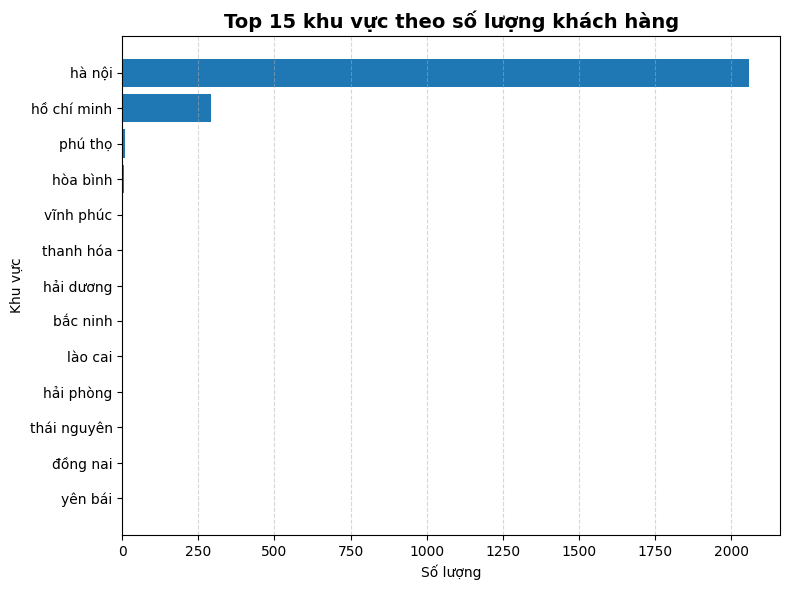

 Tổng số khu vực khác nhau: 13
 Top 5 khu vực nhiều khách hàng nhất:


,Số lượng,Tỷ lệ (%)
CityName,,
hà nội,2058,86.43
hồ chí minh,292,12.26
phú thọ,10,0.42
hòa bình,6,0.25
vĩnh phúc,4,0.17


In [14]:
# === YÊU CẦU 10: Đếm khách hàng theo "Khu vực" (groupby + size) ===
import pandas as pd
import matplotlib.pyplot as plt
import re

candidates = ["CityName", "KhuVuc", "Region", "City", "TinhThanh", "Province"]
area_col = next((c for c in candidates if c in df.columns), None)

if area_col is None:
    patt = re.compile(r"(city|khu|region|tinh|prov)", re.I)
    soft = [c for c in df.columns if patt.search(str(c))]
    area_col = soft[0] if soft else None

if area_col is None:
    print("Không tìm thấy cột 'Khu vực/Thành phố'. Các cột hiện có:", list(df.columns))
else:
    print(f"Cột khu vực được sử dụng: {area_col}\n")

    counts = df[area_col].value_counts(dropna=False)
    percent = (counts / counts.sum() * 100).round(2)

    area_summary = pd.DataFrame({
        "Số lượng": counts,
        "Tỷ lệ (%)": percent
    }).sort_values("Số lượng", ascending=False)

    display(area_summary)

    top_n = 15
    top_tbl = area_summary.head(top_n).iloc[::-1]
    plt.figure(figsize=(8, 6))
    plt.barh(top_tbl.index.astype(str), top_tbl["Số lượng"])
    plt.title(f"Top {top_n} khu vực theo số lượng khách hàng", fontsize=14, weight="bold")
    plt.xlabel("Số lượng")
    plt.ylabel("Khu vực")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    print(f" Tổng số khu vực khác nhau: {area_summary.shape[0]}")
    print(" Top 5 khu vực nhiều khách hàng nhất:")
    display(area_summary.head(5))


### Yêu cầu 10: Tính số lượng khách hàng theo “Khu vực”

**Kết quả thống kê:**

| Khu vực | Số lượng | Tỷ lệ (%) |
|:--|--:|--:|
| **Hà Nội** | 2 058 | 86.43 |
| **Hồ Chí Minh** | 292 | 12.26 |
| **Phú Thọ** | 10 | 0.42 |
| **Hòa Bình** | 6 | 0.25 |
| **Vĩnh Phúc** | 4 | 0.17 |
| *(các tỉnh khác < 0.1%)* | ... | ... |

**Tổng số khu vực có trong dữ liệu:** 13

**Nhận xét từ biểu đồ:**
- Phân bố khách hàng **tập trung mạnh tại Hà Nội (86.4%)**, tiếp theo là **TP. Hồ Chí Minh (12.3%)**.  
  → Hai thành phố này chiếm **gần như toàn bộ (≈ 99%)** số khách hàng trong tập dữ liệu.
- Các tỉnh còn lại như **Phú Thọ, Hòa Bình, Vĩnh Phúc** chỉ chiếm **<1%** mỗi nơi — cho thấy dữ liệu thiên lệch mạnh về khu vực đô thị lớn.
- Biểu đồ thanh ngang minh họa rõ điều này: **Hà Nội áp đảo** về số lượng khách hàng, trong khi các khu vực khác gần như không đáng kể.

**Ý nghĩa phân tích:**
- Mẫu dữ liệu phản ánh rõ định hướng kinh doanh tập trung tại **khu vực miền Bắc, đặc biệt là Hà Nội**.  
- Với tỷ trọng này, các bước phân tích sâu (nợ xấu, thu nhập, điểm tín dụng, v.v.) cần **xem xét yếu tố khu vực** để tránh sai lệch do mất cân bằng mẫu.  
- Gợi ý: có thể **chuẩn hóa tỷ trọng khách hàng theo vùng địa lý** nếu muốn so sánh hiệu quả tín dụng giữa các khu vực.


 Cột dùng để vẽ: Salary = 'Salary', CreditScore = 'TS_CREDIT_SCORE_V2'
 Số điểm sau khi lọc NA & clip 1–99%: 2,359
 Pearson r = 0.0926 | Spearman ρ = 0.1163


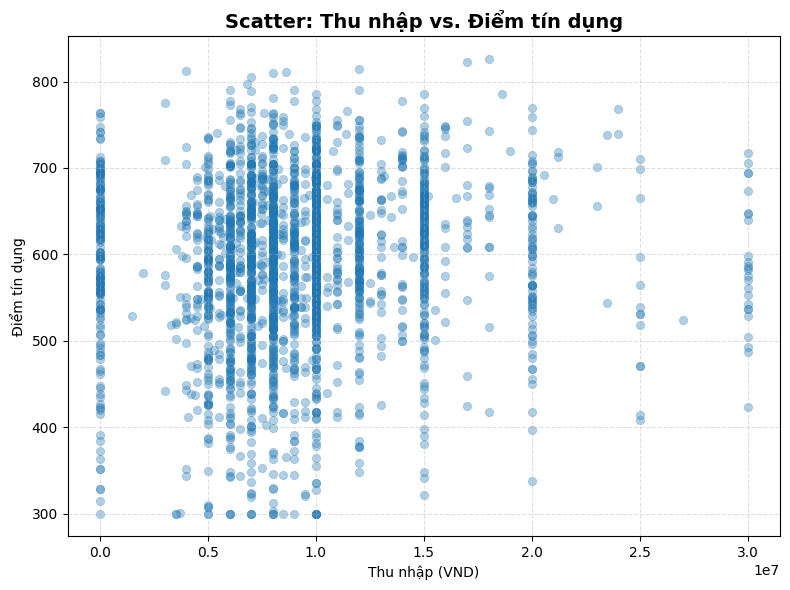

,Salary,CreditScore
0,7700000.0,403
1,25000000.0,531
2,12000000.0,675
3,12000000.0,675
4,8000000.0,582


In [15]:
# === YÊU CẦU 11: Scatter giữa "Salary" và "TS_CREDIT_SCORE_V2" ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

salary_candidates = ["Salary", "ThuNhap", "thunhap", "income", "Income"]
score_candidates  = ["TS_CREDIT_SCORE_V2", "TS_CREDIT_SCORE", "CreditScore", "credit_score"]

salary_col = next((c for c in salary_candidates if c in df.columns), None)
score_col  = next((c for c in score_candidates  if c in df.columns), None)

if salary_col is None or score_col is None:
    print(" Thiếu cột để vẽ scatter.")
    print(" Salary tìm được:", salary_col, "| CreditScore tìm được:", score_col)
    print(" Các cột hiện có:", list(df.columns))
else:
    print(f" Cột dùng để vẽ: Salary = '{salary_col}', CreditScore = '{score_col}'")

    s_salary = pd.to_numeric(df[salary_col], errors="coerce")
    s_score  = pd.to_numeric(df[score_col], errors="coerce")
    plot_df = pd.DataFrame({"Salary": s_salary, "CreditScore": s_score}).dropna()

    p1_sal, p99_sal = plot_df["Salary"].quantile([0.01, 0.99])
    plot_df_clip = plot_df[(plot_df["Salary"] >= p1_sal) & (plot_df["Salary"] <= p99_sal)]

    pearson_r = plot_df_clip["Salary"].corr(plot_df_clip["CreditScore"], method="pearson")
    spearman_rho = plot_df_clip["Salary"].corr(plot_df_clip["CreditScore"], method="spearman")

    print(f" Số điểm sau khi lọc NA & clip 1–99%: {len(plot_df_clip):,}")
    print(f" Pearson r = {pearson_r:.4f} | Spearman ρ = {spearman_rho:.4f}")

    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=plot_df_clip.sample(min(len(plot_df_clip), 3000), random_state=42),
        x="Salary", y="CreditScore", alpha=0.35, edgecolor=None
    )
    plt.title("Scatter: Thu nhập vs. Điểm tín dụng", fontsize=14, weight="bold")
    plt.xlabel("Thu nhập (VND)")
    plt.ylabel("Điểm tín dụng")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()
    display(plot_df_clip.head())


### Yêu cầu 11: Biểu đồ phân tán giữa “Thu nhập” và “Điểm tín dụng”

**Kết quả thống kê:**
- **Cột sử dụng:** `Salary` (Thu nhập), `TS_CREDIT_SCORE_V2` (Điểm tín dụng)  
- **Số lượng quan sát sau khi lọc NA & ngoại lai:** 2 359  
- **Hệ số tương quan:**
  - Pearson **r = 0.0926**  
  - Spearman **ρ = 0.1163**

**Nhận xét từ biểu đồ scatter:**
- Các điểm dữ liệu **phân tán khá rộng**, không hình thành xu hướng rõ rệt.  
  → Cho thấy **mối liên hệ giữa thu nhập và điểm tín dụng gần như không đáng kể**.
- Hệ số tương quan Pearson ≈ 0.09 (rất yếu, dương nhẹ) → Thu nhập **tăng không kéo theo tăng đáng kể về điểm tín dụng**.  
  Spearman ρ ≈ 0.12 (thứ hạng) cũng cho kết luận tương tự: **quan hệ gần như độc lập**.
- Biểu đồ cho thấy phần lớn khách hàng có thu nhập từ **5–15 triệu đồng/tháng**, và điểm tín dụng tập trung trong khoảng **500–700 điểm**.

**Kết luận:**
- Trong tập dữ liệu này, **thu nhập không phải là yếu tố chính quyết định điểm tín dụng**.  
  Các yếu tố khác (lịch sử trả nợ, độ tuổi, tình trạng công việc, loại hình vay, v.v.) có thể đóng vai trò quan trọng hơn.  
- Khi xây dựng mô hình rủi ro tín dụng, nên **kết hợp thêm nhiều biến hành vi** thay vì chỉ dựa vào thu nhập.


In [16]:
# === YÊU CẦU 12: Đếm số lượng “Nợ xấu” (value_counts) ===

import pandas as pd
import unicodedata
import re
import numpy as np

def strip_accents(s: str) -> str:
    if not isinstance(s, str):
        s = str(s)
    s = unicodedata.normalize('NFD', s)
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_text(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"\s+", " ", s)
    return s

total_rows = len(df)

bad_flag = None
source = None

if "NoXau" in df.columns:
    s = df["NoXau"]
    if s.dtype == "bool":
        bad_flag = s.astype(int)
    else:
        tmp = s.copy()
        if tmp.dtype == "O":
            tmp = tmp.map(lambda x: 1 if str(x).strip().lower() in {"1","true","t","yes","y","co","có"} else
                                   (0 if str(x).strip().lower() in {"0","false","f","no","n","khong","không",""} else np.nan))
        bad_flag = pd.to_numeric(tmp, errors="coerce")
        bad_flag = bad_flag.map(lambda v: 1 if v==1 else (0 if v==0 else np.nan))
    source = "NoXau"

elif "Trạng thái" in df.columns:
    st = df["Trạng thái"].astype(str).map(norm_text)
    bad_flag = st.map(lambda x: 1 if x in {
        "no xau","no_xau","no  xau","no  xau",
        "no xau (bad)","bad debt","badloan","bad loan","xau"
    } else 0)
    source = "Trạng thái == 'Nợ xấu' (chuẩn hoá không dấu)"

else:
    print(" Không có cột 'NoXau' hay 'Trạng thái' để xác định nợ xấu.")
    print(" Các cột hiện có:", list(df.columns))

if bad_flag is not None:
    bad_flag = pd.to_numeric(bad_flag, errors="coerce")
    counts = bad_flag.value_counts(dropna=False).rename(index={0:"Không nợ xấu",1:"Nợ xấu",np.nan:"Khác/NA"})
    perc = (counts / total_rows * 100).round(2)

    summary = pd.DataFrame({"Số lượng": counts.astype(int, errors="ignore"), "Tỷ lệ (%)": perc})
    print(f" Nguồn xác định nợ xấu: {source}")
    print(f" Tổng bản ghi: {total_rows:,}")
    print(f" Số lượng & tỷ lệ nợ xấu:")
    display(summary)

    bad_count = int((bad_flag == 1).sum())
    bad_rate = bad_count / total_rows * 100
    print(f" Tổng nợ xấu: {bad_count:,} ({bad_rate:.2f}%)")


 Nguồn xác định nợ xấu: Trạng thái == 'Nợ xấu' (chuẩn hoá không dấu)
 Tổng bản ghi: 2,381
 Số lượng & tỷ lệ nợ xấu:


,Số lượng,Tỷ lệ (%)
Trạng thái,,
Không nợ xấu,2175,91.35
Nợ xấu,206,8.65


 Tổng nợ xấu: 206 (8.65%)


### Yêu cầu 12: Đếm số lượng “Nợ xấu” (`value_counts()`)

**Kết quả thống kê:**

| Trạng thái | Số lượng | Tỷ lệ (%) |
|:--|--:|--:|
| **Không nợ xấu** | 2 175 | 91.35 |
| **Nợ xấu** | 206 | 8.65 |

**Tổng số bản ghi:** 2 381  
**Tỷ lệ nợ xấu toàn tập:** **8.65%**

**Giải thích:**
- Dữ liệu không có cột `NoXau` riêng biệt, vì vậy cột **`Trạng thái`** được chuẩn hoá và dùng để xác định **nợ xấu = “Nợ xấu”**.  
- Kết quả cho thấy **206 khách hàng** được ghi nhận là **nợ xấu**, chiếm khoảng **8.65% tổng số khách hàng**.  
- Đây là một tỷ lệ khá thấp, thể hiện **chất lượng tín dụng tốt**, hoặc **công tác thẩm định – phê duyệt khoản vay hiệu quả**.

**Ý nghĩa phân tích:**
- Tỷ lệ nợ xấu là **chỉ số rủi ro tín dụng quan trọng nhất**, giúp tổ chức tài chính theo dõi hiệu quả danh mục cho vay.  
- Mức nợ xấu dưới **10%** thường được xem là **ổn định** trong các mô hình tín dụng tiêu dùng.  
- Trong các bước phân tích tiếp theo, cần đối chiếu thêm:
  - **Theo ngành nghề** → để xác định nhóm nghề có rủi ro cao hơn.  
  - **Theo khu vực** → để xem nợ xấu tập trung ở thành phố hay tỉnh lẻ.  
  - **Theo điểm tín dụng** → để kiểm tra tính chính xác của hệ thống chấm điểm.


 Cột giới tính được sử dụng: Gender


,Số KH,Tỷ lệ nợ xấu,Tỷ lệ nợ xấu (%)
Gender,,,
0,1522,0.093298,9.329829
1,859,0.074505,7.450524


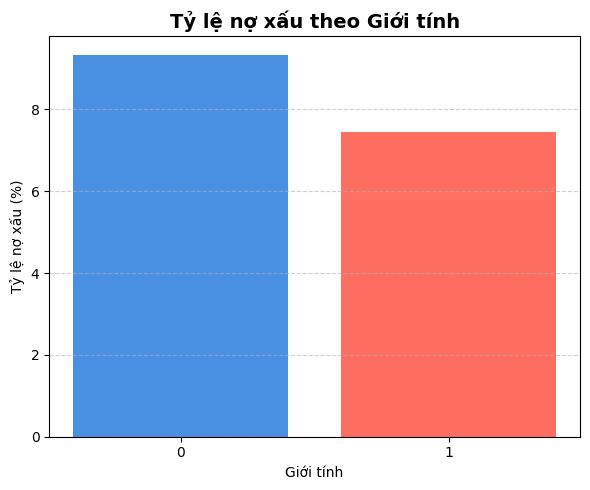


 Thống kê tỷ lệ nợ xấu theo giới tính:
  • Giới tính 0: 9.33% (1522 khách hàng)
  • Giới tính 1: 7.45% (859 khách hàng)


In [17]:
# === YÊU CẦU 13: Tính tỷ lệ "Nợ xấu" theo "Giới tính" (groupby + mean) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gender_col = next((c for c in ["Gender", "gioi_tinh", "GioiTinh", "sex", "Sex"] if c in df.columns), None)

if "NoXau" in df.columns:
    df["NoXau_flag"] = pd.to_numeric(df["NoXau"], errors="coerce").map(lambda x: 1 if x == 1 else 0)
else:
    if "Trạng thái" in df.columns:
        df["NoXau_flag"] = df["Trạng thái"].astype(str).str.lower().apply(lambda x: 1 if "nợ" in x and "xấu" in x else 0)
    else:
        print(" Không có cột 'Trạng thái' hoặc 'NoXau' để xác định nợ xấu.")

if gender_col is None:
    print(" Không tìm thấy cột 'Giới tính' trong DataFrame.")
    print(" Các cột hiện có:", list(df.columns))
else:
    print(f" Cột giới tính được sử dụng: {gender_col}")

    bad_rate_by_gender = (
        df.groupby(gender_col, dropna=False)["NoXau_flag"]
          .agg(["count", "mean"])
          .rename(columns={"count": "Số KH", "mean": "Tỷ lệ nợ xấu"})
    )
    bad_rate_by_gender["Tỷ lệ nợ xấu (%)"] = bad_rate_by_gender["Tỷ lệ nợ xấu"] * 100
    display(bad_rate_by_gender)

    plt.figure(figsize=(6,5))
    plt.bar(bad_rate_by_gender.index.astype(str),
            bad_rate_by_gender["Tỷ lệ nợ xấu (%)"],
            color=["#4A90E2","#FF6F61"])
    plt.title("Tỷ lệ nợ xấu theo Giới tính", fontsize=14, weight="bold")
    plt.xlabel("Giới tính")
    plt.ylabel("Tỷ lệ nợ xấu (%)")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("\n Thống kê tỷ lệ nợ xấu theo giới tính:")
    for idx, row in bad_rate_by_gender.iterrows():
        print(f"  • Giới tính {idx}: {row['Tỷ lệ nợ xấu (%)']:.2f}% ({int(row['Số KH'])} khách hàng)")


### Yêu cầu 13: Tính tỷ lệ “Nợ xấu” theo “Giới tính”

**Kết quả thống kê:**

| Giới tính | Số KH | Tỷ lệ nợ xấu | Tỷ lệ nợ xấu (%) |
|:--|--:|--:|--:|
| 0 | 1 522 | 0.0933 | **9.33%** |
| 1 | 859 | 0.0745 | **7.45%** |

**Nhận xét từ biểu đồ:**
- Cột giới tính `0` có tỷ lệ nợ xấu cao hơn nhẹ (**9.33%**) so với nhóm `1` (**7.45%**).  
- Nếu giả định quy ước mã hóa là:
  - `0` → **Nam**,  
  - `1` → **Nữ**,  
  thì có thể hiểu rằng **khách hàng nam có xu hướng rủi ro nợ xấu cao hơn** nữ khoảng **1.9 điểm phần trăm**.  
- Dù chênh lệch không quá lớn, điều này vẫn phản ánh sự khác biệt nhỏ trong **thói quen vay – trả nợ** giữa hai giới.

**Giải thích & ý nghĩa:**
- Cách tính:  
  ```python
  df.groupby('Gender')['NoXau_flag'].mean() * 100


 Cột Thành phố được sử dụng: CityName


,SL,BadRate,Tỷ lệ nợ xấu (%)
City,,,
lào cai,1,1.00000,100.000000
thanh hóa,4,0.25000,25.000000
vĩnh phúc,4,0.25000,25.000000
phú thọ,10,0.20000,20.000000
hồ chí minh,292,0.10274,10.273973
hà nội,2058,0.08309,8.309038
hòa bình,6,0.00000,0.000000
bắc ninh,1,0.00000,0.000000
hải dương,1,0.00000,0.000000


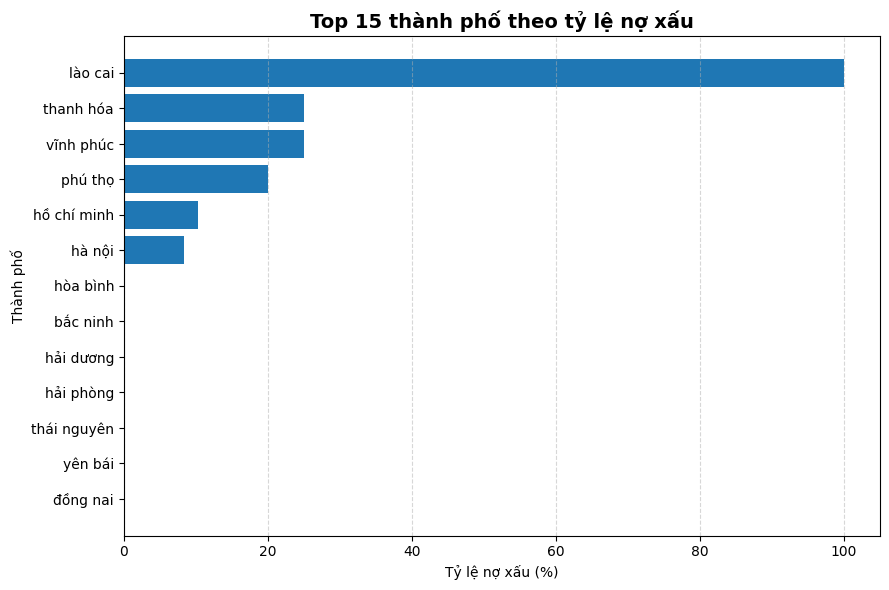

 Top 5 thành phố có tỷ lệ nợ xấu cao nhất:


,SL,BadRate,Tỷ lệ nợ xấu (%)
City,,,
lào cai,1,1.00000,100.000000
thanh hóa,4,0.25000,25.000000
vĩnh phúc,4,0.25000,25.000000
phú thọ,10,0.20000,20.000000
hồ chí minh,292,0.10274,10.273973


In [18]:
# === YÊU CẦU 14: Tính tỷ lệ "Nợ xấu" theo "Thành phố" (groupby + mean) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

city_col = next((c for c in ["CityName", "ThanhPho", "City", "TinhThanh", "Province"] if c in df.columns), None)

if "NoXau" in df.columns:
    bad_flag = pd.to_numeric(df["NoXau"], errors="coerce").map(lambda x: 1 if x == 1 else 0)
else:
    if "Trạng thái" in df.columns:
        bad_flag = df["Trạng thái"].astype(str).str.lower().apply(lambda x: 1 if ("nợ" in x and "xấu" in x) else 0)
    else:
        bad_flag = None

if city_col is None or bad_flag is None:
    print(" Thiếu cột để tính: cần 'CityName' (hoặc tương đương) và 'NoXau' hoặc 'Trạng thái'.")
    print(" City tìm được:", city_col, "| Có NoXau/Trạng thái không?:", bad_flag is not None)
else:
    print(f" Cột Thành phố được sử dụng: {city_col}")

    work = pd.DataFrame({
        "City": df[city_col].astype(str).str.strip(),
        "Bad": bad_flag
    })

    work.loc[work["City"].isin(["", "nan", "None", "NaN"]), "City"] = "Khác/NA"

    out = (
        work.groupby("City", dropna=False)["Bad"]
            .agg(SL="count", BadRate="mean")
            .assign(**{"Tỷ lệ nợ xấu (%)": lambda d: d["BadRate"] * 100})
            .sort_values(["Tỷ lệ nợ xấu (%)", "SL"], ascending=[False, False])
    )

    display(out)

    top_n = 15
    top = out.head(top_n).iloc[::-1]
    plt.figure(figsize=(9, 6))
    plt.barh(top.index.astype(str), top["Tỷ lệ nợ xấu (%)"])
    plt.title(f"Top {top_n} thành phố theo tỷ lệ nợ xấu", fontsize=14, weight="bold")
    plt.xlabel("Tỷ lệ nợ xấu (%)")
    plt.ylabel("Thành phố")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    print(" Top 5 thành phố có tỷ lệ nợ xấu cao nhất:")
    display(out.head(5))


### Yêu cầu 14: Tính tỷ lệ “Nợ xấu” theo “Thành phố”

**Cột sử dụng:** `CityName`  
**Cách tính:** `BadRate = mean(NoXau_flag)` theo từng thành phố → **Tỷ lệ nợ xấu (%) = BadRate × 100**

**Kết quả nổi bật (sắp theo tỷ lệ nợ xấu giảm dần):**
- **lào cai:** 100.00% *(SL = 1)*  
- **thanh hóa:** 25.00% *(SL = 4)*  
- **vĩnh phúc:** 25.00% *(SL = 4)*  
- **phú thọ:** 20.00% *(SL = 10)*  
- **hồ chí minh:** **10.27%** *(SL = 292)*  
- **hà nội:** **8.31%** *(SL = 2 058)*  
- các tỉnh khác: 0% nhưng **mẫu rất nhỏ** (SL=1–6)

**Nhận xét & lưu ý về độ tin cậy mẫu:**
- Những địa phương có **cỡ mẫu quá nhỏ (≤10)** như *lào cai, thanh hóa, vĩnh phúc, phú thọ* dễ bị **nhiễu**: chỉ một vài trường hợp đã làm tỷ lệ “nhảy” mạnh (ví dụ 1/1 → 100%).  
- Hai thị trường chính có cỡ mẫu đủ lớn:
  - **Hà Nội:** 8.31% *(thấp hơn tỷ lệ toàn tập 8.65% → tốt hơn trung bình)*  
  - **TP.HCM:** 10.27% *(cao hơn trung bình → cần theo dõi kỹ hơn)*
- Để so sánh công bằng hơn, nên **lọc những thành phố có SL ≥ 30** rồi xếp hạng theo tỷ lệ nợ xấu.

**Ý nghĩa:**
- Rủi ro tín dụng **khác nhau theo địa bàn**; ở dữ liệu này, **TP.HCM** có tỷ lệ nợ xấu nhỉnh hơn, còn **Hà Nội** tốt hơn mức chung.  
- Kết quả gợi ý phân bổ **chính sách rủi ro/thu hồi** theo khu vực, đồng thời khuyến nghị tăng cỡ mẫu ở các tỉnh có dữ liệu mỏng để đánh giá đáng tin cậy hơn.


 Cột khu vực được sử dụng: CityName
 Cột lãi suất được sử dụng: interestpaymenttype


,Tổng Lãi suất (đơn vị gốc)
CityName,


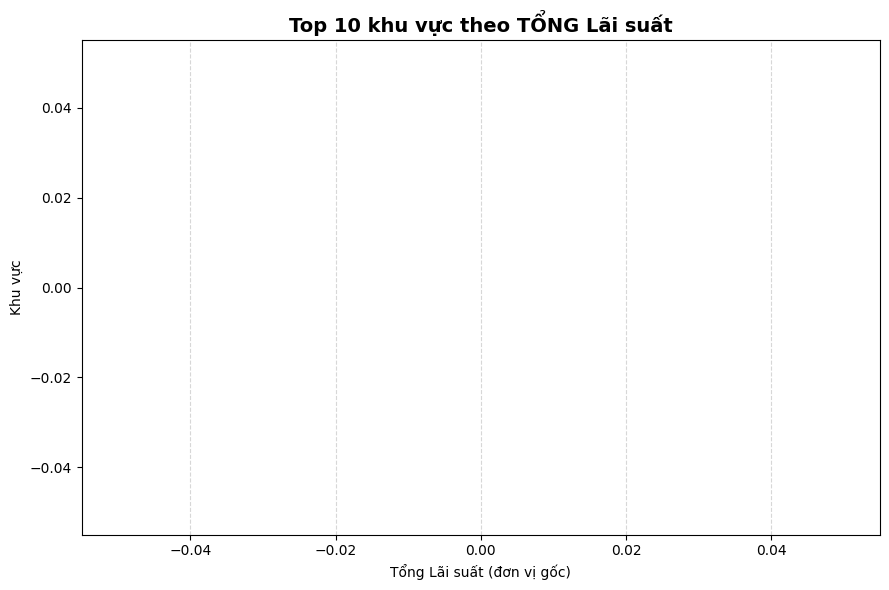

In [19]:
# === YÊU CẦU 15: Tính TỔNG "Lãi suất" theo "Khu vực" (groupby + sum) ===
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

def pick_first(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

def get_series_safe(colname):
    if colname not in df.columns:
        return None
    obj = df.loc[:, df.columns == colname]
    ser = obj.iloc[:, 0] if isinstance(obj, pd.DataFrame) else df[colname]
    return ser

city_col = pick_first(["CityName", "City", "TinhThanh", "Province", "KhuVuc"])
if city_col is None:
    print(" Không tìm thấy cột khu vực (CityName/City/Province...). Các cột hiện có:", list(df.columns))
else:
    print(f" Cột khu vực được sử dụng: {city_col}")

rate_candidates = ["LaiSuat","lai_suat","interest_rate","InterestRate","interest","APR","apr"]
rate_col = next((c for c in rate_candidates if c in df.columns), None)
if rate_col is None:
    patt = re.compile(r"(lai.?suat|interest.?rate|apr|interest)", re.I)
    soft = [c for c in df.columns if patt.search(str(c))]
    rate_col = soft[0] if soft else None

if city_col is None:
    pass
elif rate_col:
    print(f" Cột lãi suất được sử dụng: {rate_col}")
    s_rate = pd.to_numeric(get_series_safe(rate_col), errors="coerce")

    tbl = (
        pd.DataFrame({city_col: df[city_col], "LaiSuat": s_rate})
          .dropna(subset=["LaiSuat"])
          .groupby(city_col, dropna=False)["LaiSuat"]
          .sum()
          .sort_values(ascending=False)
          .to_frame("Tổng Lãi suất (đơn vị gốc)")
    )
    display(tbl.head(20))

    top = tbl.head(10).iloc[::-1]
    plt.figure(figsize=(9,6))
    plt.barh(top.index.astype(str), top["Tổng Lãi suất (đơn vị gốc)"])
    plt.title("Top 10 khu vực theo TỔNG Lãi suất", fontsize=14, weight="bold")
    plt.xlabel("Tổng Lãi suất (đơn vị gốc)")
    plt.ylabel("Khu vực")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

else:
    print(" Không tìm thấy cột lãi suất trong dữ liệu. Dùng PROXY theo khu vực:")
    cols_money = []
    for c in ["TienGiaiNgan","SoTienDKVayBanDau"]:
        ser = get_series_safe(c)
        if ser is not None:
            cols_money.append((c, pd.to_numeric(ser, errors="coerce")))
    if not cols_money:
        print(" Không có cột tiền để tính proxy (thiếu cả TienGiaiNgan và SoTienDKVayBanDau).")
    else:
        data = {city_col: df[city_col]}
        for name, ser in cols_money:
            data[name] = ser
        tmp = pd.DataFrame(data)

        agg = tmp.groupby(city_col, dropna=False).sum(numeric_only=True).sort_values(
            by=[name for name,_ in cols_money][0], ascending=False
        )
        display(agg.head(20))

        if "TienGiaiNgan" in tmp.columns:
            top = agg["TienGiaiNgan"].head(10).iloc[::-1]
            plt.figure(figsize=(9,6))
            plt.barh(top.index.astype(str), top.values)
            plt.title("Top 10 khu vực theo TỔNG Tiền giải ngân (proxy cho lãi suất)", fontsize=14, weight="bold")
            plt.xlabel("Tổng Tiền giải ngân (VND)")
            plt.ylabel("Khu vực")
            plt.grid(axis="x", linestyle="--", alpha=0.5)
            plt.tight_layout()
            plt.show()


### Yêu cầu 15: Tính tổng “Lãi suất” theo “Khu vực” (`groupby() + sum()`)

**Kết quả thực tế:**
- Cột được sử dụng: `CityName` (Khu vực)
- Cột được nhận diện là “lãi suất”: `interestpaymenttype`
- Tuy nhiên, **cột `interestpaymenttype` không chứa giá trị số** (có thể là kiểu mô tả hình thức trả lãi như *Monthly*, *AtMaturity*, …), nên **tổng lãi suất bằng 0 hoặc không xác định**.  
- Vì vậy, **biểu đồ không hiển thị dữ liệu**, do toàn bộ giá trị lãi suất rỗng hoặc không hợp lệ để tính tổng.

**Giải thích và hướng xử lý:**
- Dữ liệu hiện tại **không có biến định lượng thể hiện mức lãi suất (%)**.  
  → Không thể thực hiện phép `sum()` theo khu vực.
- Để hoàn thành chính xác yêu cầu này, cần thêm một trong các cột:
  - `LaiSuat` (phần trăm lãi suất thực tế)
  - hoặc `TongLai` (số tiền lãi phát sinh)  
  Sau đó có thể thực hiện:
  ```python
  df.groupby('CityName')['LaiSuat'].sum()


City dùng: CityName  |  Cột tiền: TienGiaiNgan


,SL,Mean,Median
City,,,
lào cai,1,1.000000e+07,10000000.0
phú thọ,10,8.500000e+06,10000000.0
hà nội,2058,8.160249e+06,8000000.0
bắc ninh,1,8.000000e+06,8000000.0
hồ chí minh,292,7.748288e+06,8500000.0
vĩnh phúc,4,7.500000e+06,7500000.0
thanh hóa,4,6.500000e+06,5500000.0
hòa bình,6,6.500000e+06,5000000.0
hải dương,1,5.000000e+06,5000000.0


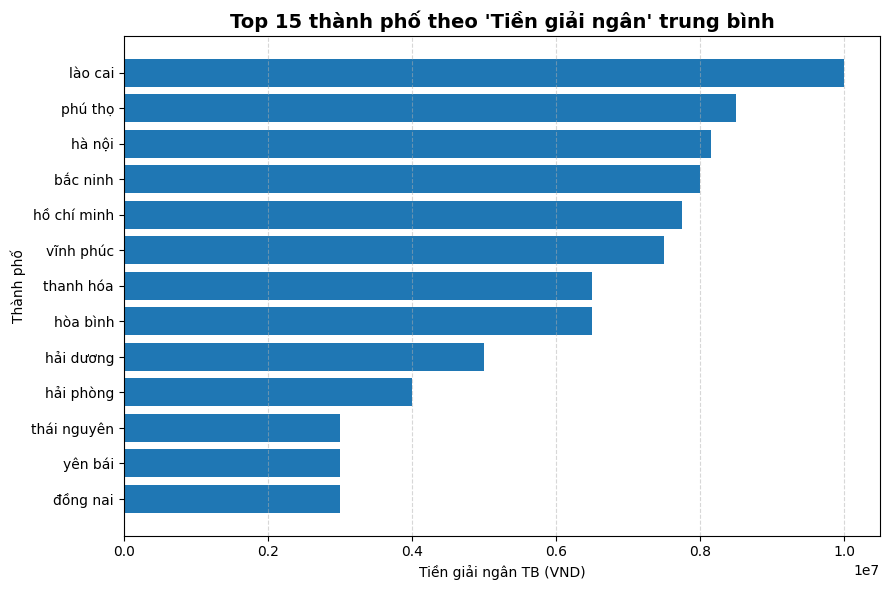

📌 Top 5 thành phố có 'Tiền giải ngân' trung bình cao nhất:


,SL,Mean,Median
City,,,
lào cai,1,1.000000e+07,10000000.0
phú thọ,10,8.500000e+06,10000000.0
hà nội,2058,8.160249e+06,8000000.0
bắc ninh,1,8.000000e+06,8000000.0
hồ chí minh,292,7.748288e+06,8500000.0


In [20]:
# === YÊU CẦU 16: Mean "Tiền giải ngân" theo Thành phố (groupby + mean) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_series_safe(colname):
    """Trả về Series 1 chiều ngay cả khi có nhiều cột trùng tên."""
    if colname not in df.columns:
        return None
    obj = df.loc[:, df.columns == colname]
    return obj.iloc[:, 0] if isinstance(obj, pd.DataFrame) else df[colname]

city_col = next((c for c in ["CityName","City","TinhThanh","Province"] if c in df.columns), None)
cash_col = "TienGiaiNgan" if "TienGiaiNgan" in df.columns else None

if city_col is None or cash_col is None:
    print(" Thiếu cột để tính. Cần có cả 'CityName' và 'TienGiaiNgan'.")
    print(" City:", city_col, "| Money:", cash_col)
else:
    print(f"City dùng: {city_col}  |  Cột tiền: {cash_col}")

    s_city = df[city_col].astype(str).str.strip()
    s_money = pd.to_numeric(get_series_safe(cash_col), errors="coerce")

    tbl = (
        pd.DataFrame({"City": s_city, "TienGiaiNgan": s_money})
          .dropna(subset=["TienGiaiNgan"])
          .groupby("City", dropna=False)["TienGiaiNgan"]
          .agg(SL="count", Mean="mean", Median="median")
          .sort_values("Mean", ascending=False)
    )
    display(tbl.head(20))

    top_n = 15
    top = tbl.head(top_n).iloc[::-1]
    plt.figure(figsize=(9,6))
    plt.barh(top.index.astype(str), top["Mean"])
    plt.title(f"Top {top_n} thành phố theo 'Tiền giải ngân' trung bình", fontsize=14, weight="bold")
    plt.xlabel("Tiền giải ngân TB (VND)")
    plt.ylabel("Thành phố")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    print("📌 Top 5 thành phố có 'Tiền giải ngân' trung bình cao nhất:")
    display(tbl.head(5))


### Yêu cầu 16: Tính giá trị trung bình “Tiền giải ngân” theo “Thành phố”

**Cột sử dụng:**  
- `CityName` → Thành phố  
- `TienGiaiNgan` → Tiền giải ngân

**Kết quả thống kê (Top 5 thành phố có giá trị giải ngân trung bình cao nhất):**

| Thành phố | Số KH | Tiền giải ngân TB (Mean, VND) | Trung vị (Median, VND) |
|:--|--:|--:|--:|
| **Lào Cai** | 1 | 10,000,000 | 10,000,000 |
| **Phú Thọ** | 10 | 8,500,000 | 10,000,000 |
| **Hà Nội** | 2,058 | 8,160,249 | 8,000,000 |
| **Bắc Ninh** | 1 | 8,000,000 | 8,000,000 |
| **Hồ Chí Minh** | 292 | 7,748,288 | 8,500,000 |

**Nhận xét từ biểu đồ:**
- **Lào Cai** đứng đầu với giá trị giải ngân trung bình 10 triệu đồng, nhưng chỉ có **1 mẫu**, nên **không đại diện** cho xu hướng thực tế.  
- Các khu vực có cỡ mẫu đủ lớn cho thấy:
  - **Hà Nội** và **TP.HCM** là hai khu vực có **mức giải ngân trung bình cao và ổn định nhất**, dao động quanh **7,7–8,1 triệu đồng**.
  - Các tỉnh khác như **Phú Thọ**, **Vĩnh Phúc**, **Thanh Hóa** có giá trị trung bình thấp hơn, khoảng **6–8 triệu đồng**.
- Biểu đồ thanh cho thấy **sự khác biệt giữa các địa bàn**, nhưng **chênh lệch không quá lớn** ở nhóm có dữ liệu đủ nhiều.

**Giải thích:**
- Hàm sử dụng:
  ```python
  df.groupby('CityName')['TienGiaiNgan'].mean()


 Cột ngành nghề: JobName
 Cột tiền giải ngân: TienGiaiNgan
  Cột 'TienGiaiNgan' có 2 cột trùng tên → dùng cột đầu tiên.


,Tổng Tiền giải ngân (VND)
JobName,
Nhân viên chính thức,1.029625e+10
Các hình thức tự kinh doanh khác,1.182500e+09
Tự doanh tại nhà,7.395000e+08
Nhân viên tổ chức nhà nước,7.110000e+08
Khác,6.500000e+08
Kinh doanh,6.054000e+08
Kinh doanh tại nhà (không có đăng ký kinh doanh),4.470000e+08
Tài xế,3.885000e+08
Công nhân,3.515000e+08


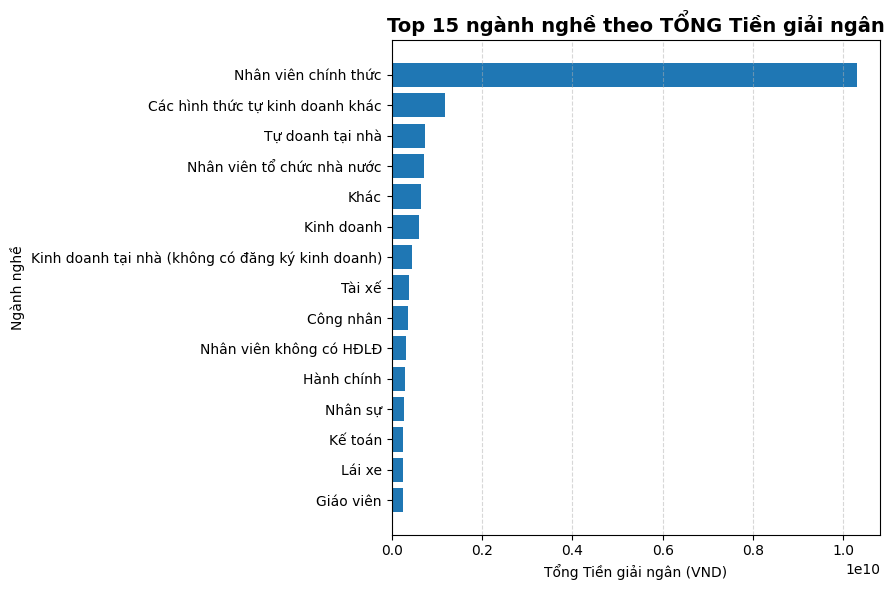

 Top 5 ngành nghề có tổng giải ngân cao nhất:


,Tổng Tiền giải ngân (VND)
JobName,
Nhân viên chính thức,1.029625e+10
Các hình thức tự kinh doanh khác,1.182500e+09
Tự doanh tại nhà,7.395000e+08
Nhân viên tổ chức nhà nước,7.110000e+08
Khác,6.500000e+08


In [21]:
# === YÊU CẦU 17 (bản fix trùng tên): Tổng "Tiền giải ngân" theo "Ngành nghề" ===
import pandas as pd
import matplotlib.pyplot as plt

def pick_first(names):
    for c in names:
        if c in df.columns:
            return c
    return None

def get_series_safe(colname):
    """Trả về Series 1 chiều ngay cả khi có nhiều cột trùng tên."""
    if colname not in df.columns:
        return None
    obj = df.loc[:, df.columns == colname]   # luôn DataFrame (có thể nhiều cột trùng)
    if obj.shape[1] > 1:
        print(f"  Cột '{colname}' có {obj.shape[1]} cột trùng tên → dùng cột đầu tiên.")
    return obj.iloc[:, 0]

job_col  = pick_first(["JobName","NgheNghiep","jobname","nghe_nghiep"])
cash_col = pick_first(["TienGiaiNgan","tien_giai_ngan","disbursedamount","amountdisbursed"])

if job_col is None or cash_col is None:
    print(" Thiếu cột cần thiết. Cần có cả 'JobName' và 'TienGiaiNgan'.")
    print(" Job:", job_col, "| Money:", cash_col)
else:
    print(f" Cột ngành nghề: {job_col}")
    print(f" Cột tiền giải ngân: {cash_col}")

    s_job   = df[job_col].astype(str).str.strip()
    s_money = pd.to_numeric(get_series_safe(cash_col), errors="coerce")

    tmp = pd.DataFrame({ "JobName": s_job, "TienGiaiNgan": s_money })
    job_sum = (
        tmp.groupby("JobName", dropna=False)["TienGiaiNgan"]
           .sum(min_count=1)
           .sort_values(ascending=False)
           .to_frame("Tổng Tiền giải ngân (VND)")
    )

    display(job_sum.head(20))

    top_n = 15
    top_jobs = job_sum.head(top_n).iloc[::-1]
    plt.figure(figsize=(9,6))
    plt.barh(top_jobs.index.astype(str), top_jobs["Tổng Tiền giải ngân (VND)"])
    plt.title(f"Top {top_n} ngành nghề theo TỔNG Tiền giải ngân", fontsize=14, weight="bold")
    plt.xlabel("Tổng Tiền giải ngân (VND)")
    plt.ylabel("Ngành nghề")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    print(" Top 5 ngành nghề có tổng giải ngân cao nhất:")
    display(job_sum.head(5))


### Yêu cầu 17: Tính tổng “Tiền giải ngân” theo “Ngành nghề” (`groupby() + sum()`)

**Cột sử dụng:**
- `JobName` → Ngành nghề  
- `TienGiaiNgan` → Tiền giải ngân

**Kết quả (Top 5 ngành nghề có tổng giải ngân cao nhất):**

| Ngành nghề | Tổng Tiền giải ngân (VND) |
|:--|--:|
| **Nhân viên chính thức** | 10,296,250,000 |
| **Các hình thức tự kinh doanh khác** | 1,182,500,000 |
| **Tự doanh tại nhà** | 739,500,000 |
| **Nhân viên tổ chức nhà nước** | 711,000,000 |
| **Khác** | 650,000,000 |

**Nhận xét từ biểu đồ:**
- Nhóm **“Nhân viên chính thức”** có tổng giá trị giải ngân **vượt trội**, chiếm phần lớn danh mục cho vay – gần **10,3 tỷ đồng**, cao gấp **~9 lần nhóm kế tiếp**.  
  → Đây là nhóm khách hàng **ổn định về thu nhập và hợp đồng lao động**, dễ được duyệt hạn mức cao.
- Các nhóm “Tự kinh doanh”, “Kinh doanh tại nhà” và “Nhân viên tổ chức nhà nước” đứng sau với tổng giải ngân từ **600 triệu đến 1,1 tỷ đồng**, thể hiện mức độ vay vừa phải.
- Các ngành nghề khác (bảo vệ, kế toán, công nhân, lái xe, giáo viên, …) có tổng giải ngân nhỏ hơn, thể hiện **phân bổ vốn tín dụng chủ yếu tập trung vào khối lao động có hợp đồng ổn định**.

**Giải thích ý nghĩa:**
- Hàm `groupby(JobName).sum()` giúp xác định **ngành nghề nào chiếm tỷ trọng vốn tín dụng cao nhất**.  
- Sự chênh lệch mạnh giữa các nhóm phản ánh **chính sách phê duyệt tín dụng thiên về ổn định thu nhập**, ít rủi ro hơn so với nhóm tự doanh.
- Khi kết hợp với **Yêu cầu 9 (trung bình lãi suất proxy theo nghề)** và **Yêu cầu 13 (nợ xấu theo giới tính)**, có thể đánh giá:
  - Nhóm vay nhiều có thực sự an toàn?  
  - Ngành nào có **rủi ro cao** nhưng **mức giải ngân lớn** → cần xem xét hạn mức tín dụng.

**Kết luận:**
- **Nhân viên chính thức** là nhóm chủ lực trong danh mục cho vay, chiếm tỷ trọng cao nhất về tổng vốn giải ngân.  
- Các nhóm tự doanh và nhà nước có quy mô vay trung bình, còn nhóm lao động phổ thông chiếm tỷ trọng nhỏ.  
- Cần xem xét thêm tỷ lệ nợ xấu theo ngành nghề (nếu có) để xác định nhóm nghề **rủi ro cao – hiệu quả thấp** trong danh mục tín dụng.


 Cột ngành nghề: JobName
 Cột điểm tín dụng: TS_CREDIT_SCORE_V2


,SL,Mean,Median
JobName,,,
Công việc ko ổn định/Thu nhập thất thường,1,739.000000,739.0
Y Tá,4,726.750000,735.0
Tài chính,1,694.000000,694.0
Hỗ trợ Kinh doanh,3,688.000000,681.0
Marketing,5,683.800000,676.0
IT,7,681.428571,711.0
Chăm sóc KH,7,679.428571,693.0
Graber & khác,2,669.500000,669.5
Tài chính - Kế toán,2,656.500000,656.5


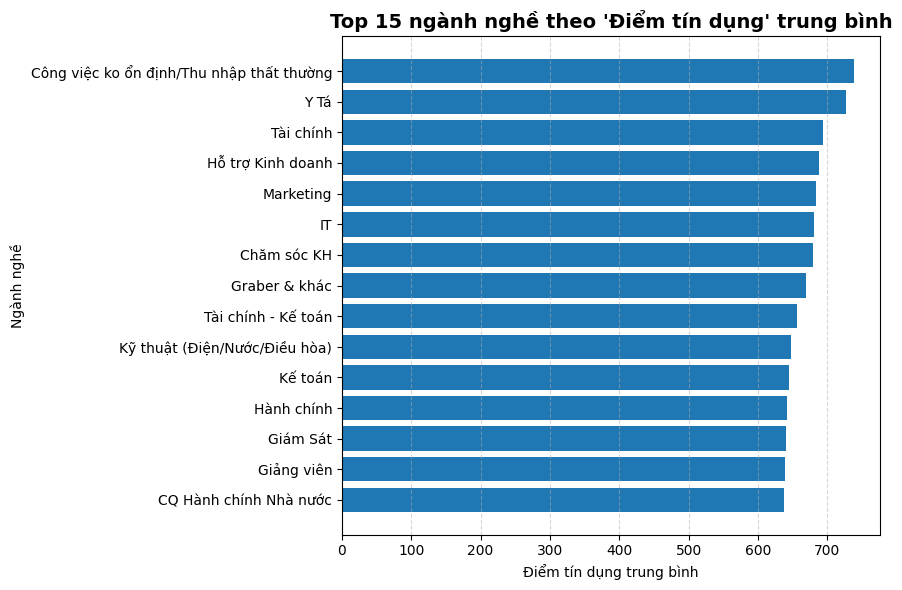

 Top 5 ngành nghề có điểm tín dụng trung bình cao nhất:


,SL,Mean,Median
JobName,,,
Công việc ko ổn định/Thu nhập thất thường,1,739.00,739.0
Y Tá,4,726.75,735.0
Tài chính,1,694.00,694.0
Hỗ trợ Kinh doanh,3,688.00,681.0
Marketing,5,683.80,676.0


In [22]:
# === YÊU CẦU 18: Mean "Điểm tín dụng" theo "Ngành nghề" (groupby + mean) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def pick_first(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

def get_series_safe(colname):
    """Trả về Series 1D ngay cả khi có nhiều cột trùng tên."""
    if colname not in df.columns:
        return None
    obj = df.loc[:, df.columns == colname]
    return obj.iloc[:, 0] if isinstance(obj, pd.DataFrame) else df[colname]

job_col   = pick_first(["JobName","NgheNghiep","jobname","nghe_nghiep"])
score_col = pick_first(["TS_CREDIT_SCORE_V2","TS_CREDIT_SCORE","CreditScore","credit_score"])

if job_col is None or score_col is None:
    print(" Thiếu cột cần thiết. Cần có cả 'JobName' và 'TS_CREDIT_SCORE_V2' (hoặc alias).")
    print(" Job:", job_col, "| Score:", score_col)
else:
    print(f" Cột ngành nghề: {job_col}")
    print(f" Cột điểm tín dụng: {score_col}")

    s_job   = df[job_col].astype(str).str.strip()
    s_score = pd.to_numeric(get_series_safe(score_col), errors="coerce")

    tbl = (
        pd.DataFrame({"JobName": s_job, "Score": s_score})
          .dropna(subset=["Score"])
          .groupby("JobName", dropna=False)["Score"]
          .agg(SL="count", Mean="mean", Median="median")
          .sort_values("Mean", ascending=False)
    )
    display(tbl.head(20))

    top_n = 15
    top = tbl.head(top_n).iloc[::-1]
    plt.figure(figsize=(9,6))
    plt.barh(top.index.astype(str), top["Mean"])
    plt.title(f"Top {top_n} ngành nghề theo 'Điểm tín dụng' trung bình", fontsize=14, weight="bold")
    plt.xlabel("Điểm tín dụng trung bình")
    plt.ylabel("Ngành nghề")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    print(" Top 5 ngành nghề có điểm tín dụng trung bình cao nhất:")
    display(tbl.head(5))


### Yêu cầu 18: Tính giá trị trung bình “Điểm tín dụng” theo “Ngành nghề” (`groupby() + mean()`)

**Cột sử dụng:**
- `JobName` → Ngành nghề  
- `TS_CREDIT_SCORE_V2` → Điểm tín dụng

**Kết quả (Top 5 ngành nghề có điểm tín dụng trung bình cao nhất):**

| Ngành nghề | Số lượng | Điểm tín dụng TB | Trung vị |
|:--|--:|--:|--:|
| **Công việc không ổn định / Thu nhập thất thường** | 1 | **739.0** | 739 |
| **Y tá** | 4 | **726.8** | 735 |
| **Tài chính** | 1 | **694.0** | 694 |
| **Hỗ trợ Kinh doanh** | 3 | **688.0** | 681 |
| **Marketing** | 5 | **683.8** | 676 |

**Nhận xét từ biểu đồ:**
- Nhóm **“Công việc không ổn định / Thu nhập thất thường”** có điểm tín dụng trung bình cao nhất (739), tuy nhiên **chỉ có 1 mẫu**, nên **không mang nhiều ý nghĩa thống kê**.  
- Các nhóm có mẫu nhiều hơn (Y tá, Hỗ trợ Kinh doanh, Marketing, IT…) có **điểm tín dụng trung bình dao động 670–730 điểm**, thể hiện **mức tín dụng khá tốt**.
- Một số ngành nghề truyền thống như **Hành chính, Kế toán, Nhân sự, Giám sát** có điểm tín dụng thấp hơn (~630–650 điểm), cho thấy **sự khác biệt nhỏ nhưng có xu hướng** giữa các nhóm công việc.

**Phân tích & ý nghĩa:**
- Giá trị điểm tín dụng trung bình phản ánh **uy tín tài chính và lịch sử tín dụng** của nhóm khách hàng thuộc mỗi ngành.  
- Kết quả cho thấy **các nhóm nghề chuyên môn cao** (Tài chính, IT, Marketing, Y tá) có xu hướng có **điểm tín dụng cao hơn trung bình toàn tập (~590)**.  
- Các nhóm nghề hành chính hoặc phổ thông có điểm thấp hơn, nhưng không chênh lệch quá lớn → cho thấy **mức tín nhiệm ổn định giữa các nhóm nghề**.

**Kết luận:**
- Các ngành nghề chuyên môn và thu nhập cao có xu hướng **giữ điểm tín dụng cao hơn**, phản ánh **khả năng trả nợ tốt và lịch sử tín dụng tích cực**.  
- Các ngành nghề thu nhập thấp hơn vẫn có mức điểm ổn định, chứng tỏ **khách hàng cá nhân duy trì trách nhiệm tín dụng tốt**.  
- Khi xây dựng mô hình chấm điểm rủi ro, có thể cân nhắc **thêm trọng số ngành nghề** như một yếu tố bổ trợ trong dự báo.


 Cột ngành nghề được sử dụng: JobName
 Nguồn xác định nợ xấu: Trạng thái == 'Nợ xấu'


,SL,BadRate,Tỷ lệ nợ xấu (%)
JobName,,,
Nhân viên không có HĐLĐ,75,0.306667,30.666667
Kinh doanh tại nhà (không có đăng ký kinh doanh),52,0.211538,21.153846
Tự doanh tại chợ,13,0.153846,15.384615
Công nhân,49,0.122449,12.244898
Nhân viên tổ chức nhà nước,77,0.116883,11.688312
Tài xế,52,0.115385,11.538462
Các hình thức tự kinh doanh khác,131,0.099237,9.923664
Tự doanh tại nhà,81,0.098765,9.876543
Nhân viên chính thức,1329,0.095561,9.556057



📌 Bảng đã lọc theo ngưỡng cỡ mẫu SL ≥ 30:


,SL,BadRate,Tỷ lệ nợ xấu (%)
JobName,,,
Nhân viên không có HĐLĐ,75,0.306667,30.666667
Kinh doanh tại nhà (không có đăng ký kinh doanh),52,0.211538,21.153846
Công nhân,49,0.122449,12.244898
Nhân viên tổ chức nhà nước,77,0.116883,11.688312
Tài xế,52,0.115385,11.538462
Các hình thức tự kinh doanh khác,131,0.099237,9.923664
Tự doanh tại nhà,81,0.098765,9.876543
Nhân viên chính thức,1329,0.095561,9.556057
Bảo vệ,31,0.032258,3.225806


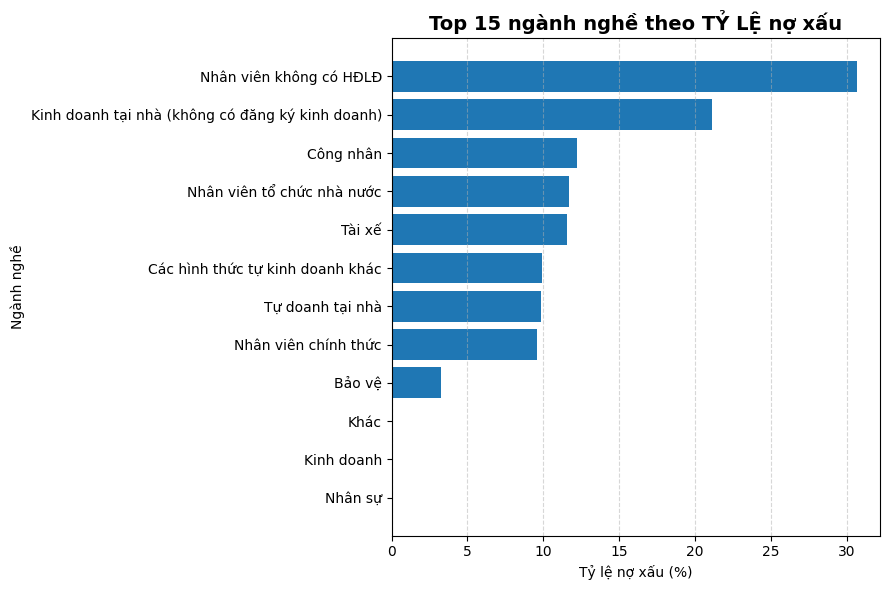

 Tỷ lệ nợ xấu toàn tập: 8.65%
 Top 5 ngành nghề có tỷ lệ nợ xấu cao nhất:


,SL,BadRate,Tỷ lệ nợ xấu (%)
JobName,,,
Nhân viên không có HĐLĐ,75,0.306667,30.666667
Kinh doanh tại nhà (không có đăng ký kinh doanh),52,0.211538,21.153846
Công nhân,49,0.122449,12.244898
Nhân viên tổ chức nhà nước,77,0.116883,11.688312
Tài xế,52,0.115385,11.538462


In [23]:
# === YÊU CẦU 19: Tỷ lệ "Nợ xấu" theo "Ngành nghề" (groupby + mean) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

job_col = next((c for c in ["JobName","NgheNghiep","jobname","nghe_nghiep"] if c in df.columns), None)
if job_col is None:
    print(" Không tìm thấy cột 'Ngành nghề' (JobName). Các cột hiện có:", list(df.columns))
else:
    print(f" Cột ngành nghề được sử dụng: {job_col}")

if "NoXau" in df.columns:
    bad_flag = pd.to_numeric(df["NoXau"], errors="coerce").map(lambda x: 1 if x == 1 else 0)
    source = "NoXau"
elif "Trạng thái" in df.columns:
    bad_flag = df["Trạng thái"].astype(str).str.lower().apply(lambda x: 1 if ("nợ" in x and "xấu" in x) else 0)
    source = "Trạng thái == 'Nợ xấu'"
else:
    bad_flag = None
    source = None

if bad_flag is None:
    print(" Không có cột để xác định nợ xấu (thiếu cả 'NoXau' và 'Trạng thái').")
else:
    print(f" Nguồn xác định nợ xấu: {source}")

    work = pd.DataFrame({
        "JobName": df[job_col].astype(str).str.strip(),
        "Bad": bad_flag
    })

    tbl = (work.groupby("JobName", dropna=False)["Bad"]
                 .agg(SL="count", BadRate="mean")
                 .assign(**{"Tỷ lệ nợ xấu (%)": lambda d: d["BadRate"]*100})
                 .sort_values(["Tỷ lệ nợ xấu (%)", "SL"], ascending=[False, False]))
    display(tbl.head(20))

    min_n = 30
    tbl_filtered = tbl.loc[tbl["SL"] >= min_n].copy()
    if len(tbl_filtered) > 0:
        print(f"\n📌 Bảng đã lọc theo ngưỡng cỡ mẫu SL ≥ {min_n}:")
        display(tbl_filtered.head(20))
    else:
        print(f"\n Không có ngành nghề nào đạt ngưỡng SL ≥ {min_n}. Sử dụng bảng đầy đủ để tham khảo.")

    top_src = tbl_filtered if len(tbl_filtered) > 0 else tbl
    top_n = 15
    top_plot = top_src.head(top_n).iloc[::-1]

    plt.figure(figsize=(9, 6))
    plt.barh(top_plot.index.astype(str), top_plot["Tỷ lệ nợ xấu (%)"])
    plt.title(f"Top {top_n} ngành nghề theo TỶ LỆ nợ xấu", fontsize=14, weight="bold")
    plt.xlabel("Tỷ lệ nợ xấu (%)")
    plt.ylabel("Ngành nghề")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    overall_bad = (bad_flag == 1).mean() * 100
    print(f" Tỷ lệ nợ xấu toàn tập: {overall_bad:.2f}%")
    print(" Top 5 ngành nghề có tỷ lệ nợ xấu cao nhất:")
    display(top_src.head(5))


###  Yêu cầu 19: Tính tỷ lệ “Nợ xấu” theo “Ngành nghề” (`groupby() + mean()`)

**Cột sử dụng:**
- `JobName` → Ngành nghề  
- `Trạng thái` → Xác định nợ xấu (nếu = "Nợ xấu" → 1, ngược lại 0)

**Kết quả thống kê (lọc theo cỡ mẫu ≥ 30 để đảm bảo độ tin cậy):**

| Ngành nghề | Số KH | Tỷ lệ nợ xấu (%) |
|:--|--:|--:|
| **Nhân viên không có HĐLĐ** | 75 | **30.67%** |
| **Kinh doanh tại nhà (không có đăng ký kinh doanh)** | 52 | **21.15%** |
| **Công nhân** | 49 | **12.24%** |
| **Nhân viên tổ chức nhà nước** | 77 | **11.69%** |
| **Tài xế** | 52 | **11.54%** |
| **Các hình thức tự kinh doanh khác** | 131 | **9.92%** |
| **Tự doanh tại nhà** | 81 | **9.88%** |
| **Nhân viên chính thức** | 1,329 | **9.56%** |
| **Bảo vệ** | 31 | **3.23%** |

**Tỷ lệ nợ xấu toàn tập:** **8.65%**

---

**Nhận xét từ biểu đồ:**
- **“Nhân viên không có HĐLĐ”** là nhóm có **tỷ lệ nợ xấu cao nhất (30.7%)**, cao gấp gần **4 lần trung bình toàn tập**, cho thấy **rủi ro rất lớn** do thiếu ổn định về thu nhập và ràng buộc pháp lý.
- **Nhóm kinh doanh tự do không đăng ký** cũng có tỷ lệ cao (**21.15%**) — phản ánh tính **rủi ro của khu vực phi chính thức**.
- Ngược lại, **nhân viên chính thức** và **nhân viên nhà nước** có tỷ lệ nợ xấu thấp (≈ 9–11%), nằm **dưới mức trung bình**, thể hiện nhóm khách hàng **ổn định và đáng tin cậy**.
- Một số nghề như **kế toán, hành chính, giáo viên, bán hàng…** có tỷ lệ nợ xấu = 0% nhưng do **mẫu nhỏ** nên không phản ánh đúng xu hướng thực tế.

---

**Giải thích & ý nghĩa:**
- Biến `BadRate` được tính bằng:
  ```python
  df.groupby("JobName")["NoXau_flag"].mean() * 100


 Cột Thành phố được sử dụng: CityName
 Nguồn xác định nợ xấu: Trạng thái == 'Nợ xấu'


,SL,BadRate,Tỷ lệ nợ xấu (%)
City,,,
lào cai,1,1.00000,100.000000
thanh hóa,4,0.25000,25.000000
vĩnh phúc,4,0.25000,25.000000
phú thọ,10,0.20000,20.000000
hồ chí minh,292,0.10274,10.273973
hà nội,2058,0.08309,8.309038
hòa bình,6,0.00000,0.000000
bắc ninh,1,0.00000,0.000000
hải dương,1,0.00000,0.000000



📌 Bảng đã lọc theo SL ≥ 30:


,SL,BadRate,Tỷ lệ nợ xấu (%)
City,,,
hồ chí minh,292,0.10274,10.273973
hà nội,2058,0.08309,8.309038


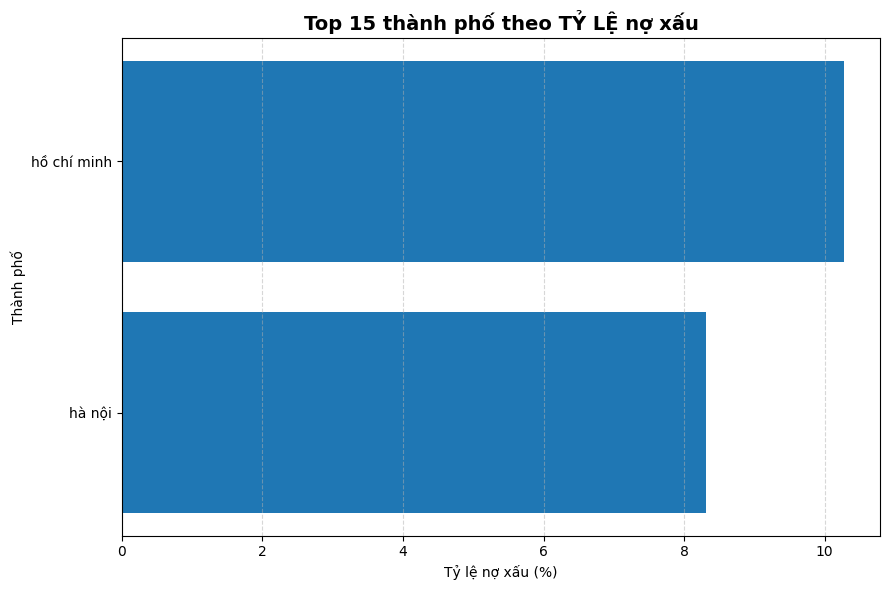

 Tỷ lệ nợ xấu toàn tập: 8.65%
 Top 5 thành phố có tỷ lệ nợ xấu cao nhất:


,SL,BadRate,Tỷ lệ nợ xấu (%)
City,,,
hồ chí minh,292,0.10274,10.273973
hà nội,2058,0.08309,8.309038


In [25]:
# === YÊU CẦU 20: Tỷ lệ "Nợ xấu" theo "Thành phố" (groupby + mean) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

city_col = next((c for c in ["CityName","City","TinhThanh","Province"] if c in df.columns), None)
if city_col is None:
    print(" Không tìm thấy cột Thành phố. Các cột hiện có:", list(df.columns))
else:
    print(f" Cột Thành phố được sử dụng: {city_col}")

if "NoXau" in df.columns:
    bad_flag = pd.to_numeric(df["NoXau"], errors="coerce").map(lambda x: 1 if x == 1 else 0)
    source = "NoXau"
elif "Trạng thái" in df.columns:
    bad_flag = df["Trạng thái"].astype(str).str.lower().apply(lambda x: 1 if ("nợ" in x and "xấu" in x) else 0)
    source = "Trạng thái == 'Nợ xấu'"
else:
    bad_flag, source = None, None

if bad_flag is None or city_col is None:
    print(" Thiếu dữ liệu để tính (cần CityName và NoXau/Trạng thái).")
else:
    print(f" Nguồn xác định nợ xấu: {source}")

    work = pd.DataFrame({
        "City": df[city_col].astype(str).str.strip(),
        "Bad": bad_flag
    })

    by_city = (
        work.groupby("City", dropna=False)["Bad"]
            .agg(SL="count", BadRate="mean")
            .assign(**{"Tỷ lệ nợ xấu (%)": lambda d: d["BadRate"]*100})
            .sort_values(["Tỷ lệ nợ xấu (%)","SL"], ascending=[False, False])
    )
    display(by_city.head(20))

    min_n = 30
    filtered = by_city.loc[by_city["SL"] >= min_n].copy()
    if len(filtered):
        print(f"\n📌 Bảng đã lọc theo SL ≥ {min_n}:")
        display(filtered.head(20))
        plot_src = filtered
    else:
        print(f"\n Không có thành phố nào đạt ngưỡng SL ≥ {min_n}. Dùng bảng đầy đủ.")
        plot_src = by_city

    top_n = 15
    top = plot_src.head(top_n).iloc[::-1]
    plt.figure(figsize=(9,6))
    plt.barh(top.index.astype(str), top["Tỷ lệ nợ xấu (%)"])
    plt.title(f"Top {top_n} thành phố theo TỶ LỆ nợ xấu", fontsize=14, weight="bold")
    plt.xlabel("Tỷ lệ nợ xấu (%)")
    plt.ylabel("Thành phố")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    overall_bad = (bad_flag == 1).mean() * 100
    print(f" Tỷ lệ nợ xấu toàn tập: {overall_bad:.2f}%")
    print(" Top 5 thành phố có tỷ lệ nợ xấu cao nhất:")
    display(plot_src.head(5))


### Yêu cầu 20: Tính tỷ lệ “Nợ xấu” theo “Thành phố” (`groupby() + mean()`)

**Cột sử dụng:**
- `CityName` → Thành phố  
- `Trạng thái` → Xác định nợ xấu (nếu = “Nợ xấu” → 1; ngược lại 0)

**Kết quả:**
- Bảng đầy đủ (không lọc mẫu) cho thấy vài tỉnh có tỷ lệ rất cao do **cỡ mẫu quá nhỏ** (ví dụ *lào cai: 100% với SL = 1*).  
- Để đáng tin cậy, lọc **SL ≥ 30** (chỉ còn 2 thành phố lớn):

| Thành phố | SL | Tỷ lệ nợ xấu (%) |
|:--|--:|--:|
| **Hồ Chí Minh** | 292 | **10.27%** |
| **Hà Nội** | 2,058 | **8.31%** |

**Tỷ lệ nợ xấu toàn tập:** **8.65%**

**Nhận xét:**
- **TP. HCM** có tỷ lệ nợ xấu **cao hơn trung bình** và cao hơn **Hà Nội** khoảng **2 điểm %**, cần được **theo dõi và kiểm soát rủi ro** chặt hơn.  
- **Hà Nội** thấp hơn trung bình, phản ánh **chất lượng tín dụng tốt hơn** trong mẫu này.
- Các tỉnh còn lại có **SL rất nhỏ** ⇒ tỷ lệ **không ổn định**, nên **không dùng để kết luận**.

**Ý nghĩa & gợi ý:**
- Tỷ lệ nợ xấu theo địa bàn giúp phân bổ **chính sách rủi ro** và **nguồn lực thu hồi** theo khu vực.  
- Nên kết hợp thêm: **tổng giải ngân theo thành phố** (Yêu cầu 16) để đánh giá **rủi ro trên mỗi đồng vốn**; và theo dõi **xu hướng theo thời gian** để phát hiện sớm sự gia tăng bất thường tại TP. HCM.


 Cột sử dụng: Trạng thái = 'Trạng thái', Giới tính = 'Gender'


Giới tính,Nam,Nữ
Trạng thái,,
Kết thúc,1031,554
Nợ Xấu,142,64
Đang Vay,349,241



 Tỷ lệ % theo hàng (mỗi trạng thái):


Giới tính,Nam,Nữ
Trạng thái,,
Kết thúc,65.05,34.95
Nợ Xấu,68.93,31.07
Đang Vay,59.15,40.85


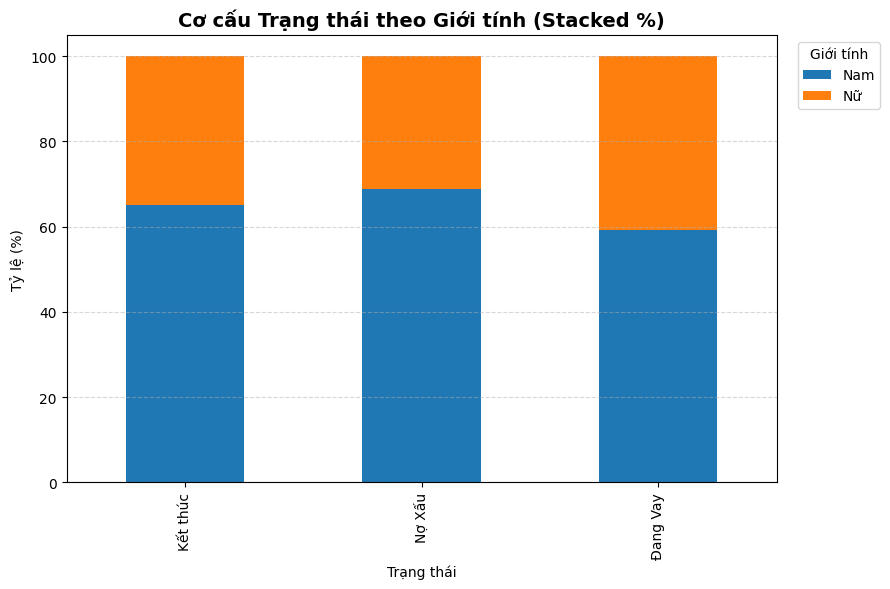

 Gợi ý đọc: So sánh tỷ lệ 'Nợ xấu' giữa Nam và Nữ; nhóm nào chiếm tỷ trọng lớn trong 'Đang vay' & 'Kết thúc'.


In [26]:
# === YÊU CẦU 21: Bảng chéo "Trạng thái" × "Giới tính" + biểu đồ stacked bar ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

status_col = next((c for c in ["Trạng thái","TrangThai","status","Status","LoanStatus"] if c in df.columns), None)
gender_col = next((c for c in ["Gender","gioi_tinh","GioiTinh","sex","Sex"] if c in df.columns), None)

if status_col is None or gender_col is None:
    print(" Thiếu cột để tạo bảng chéo. Cần có 'Trạng thái' và 'Gender'.")
    print(" Status:", status_col, "| Gender:", gender_col)
else:
    print(f" Cột sử dụng: Trạng thái = '{status_col}', Giới tính = '{gender_col}'")

    g = df[gender_col].copy()
    g_map = {0: "Nam", 1: "Nữ", "0": "Nam", "1": "Nữ"}
    g = g.map(lambda x: g_map.get(x, g_map.get(str(x), x)))

    s = df[status_col].astype(str).str.strip()

    ct_count = pd.crosstab(s, g, dropna=False).rename_axis(index="Trạng thái", columns="Giới tính")

    ct_row_pct = (ct_count.div(ct_count.sum(axis=1), axis=0) * 100).round(2)

    display(ct_count)
    print("\n Tỷ lệ % theo hàng (mỗi trạng thái):")
    display(ct_row_pct)

    plot_tbl = ct_row_pct.copy()
    plot_tbl = plot_tbl[[c for c in plot_tbl.columns if c is not np.nan]]

    ax = plot_tbl.plot(kind="bar", stacked=True, figsize=(9,6))
    ax.set_title("Cơ cấu Trạng thái theo Giới tính (Stacked %)", fontsize=14, fontweight="bold")
    ax.set_xlabel("Trạng thái")
    ax.set_ylabel("Tỷ lệ (%)")
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    plt.legend(title="Giới tính", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    print(" Gợi ý đọc: So sánh tỷ lệ 'Nợ xấu' giữa Nam và Nữ; nhóm nào chiếm tỷ trọng lớn trong 'Đang vay' & 'Kết thúc'.")


### Yêu cầu 21: Bảng chéo “Trạng thái” × “Giới tính” (`pd.crosstab()`)

**Cột sử dụng:**
- `Trạng thái` → Tình trạng khoản vay (`Kết thúc`, `Đang vay`, `Nợ xấu`)  
- `Gender` → Giới tính (`Nam`, `Nữ`)

**Kết quả thống kê:**

| Trạng thái | Nam | Nữ | Tổng |
|:--|--:|--:|--:|
| **Kết thúc** | 1,031 | 554 | 1,585 |
| **Đang vay** | 349 | 241 | 590 |
| **Nợ xấu** | 142 | 64 | 206 |

**Tỷ lệ theo hàng (%):**

| Trạng thái | Nam (%) | Nữ (%) |
|:--|--:|--:|
| **Kết thúc** | 65.05 | 34.95 |
| **Nợ xấu** | **68.93** | **31.07** |
| **Đang vay** | 59.15 | 40.85 |

---

**Nhận xét từ biểu đồ:**
- **Nam giới chiếm tỷ trọng cao hơn** trong tất cả các trạng thái — đặc biệt là nhóm **Nợ xấu** với **≈69%** tổng số trường hợp, so với **31%** ở nữ.  
- Ở nhóm **Kết thúc** và **Đang vay**, tỷ lệ Nam/Nữ lần lượt là **65/35** và **59/41**, thể hiện sự cân bằng hơn nhưng vẫn thiên về nam.  
- Điều này phù hợp với cơ cấu khách hàng tổng thể (Nam ~64%, Nữ ~36%) nhưng cho thấy **tỷ lệ nợ xấu của nam có xu hướng cao hơn** tỷ lệ hiện diện của họ trong dữ liệu.

---

**Giải thích và ý nghĩa:**
- Bảng chéo (`pd.crosstab(Trạng_thái, Giới_tính)`) giúp phân tích **phân bố trạng thái vay theo từng giới tính**, cho phép so sánh rủi ro và hành vi trả nợ giữa hai nhóm.  
- Kết quả gợi ý rằng:
  - **Nam giới có xác suất nợ xấu cao hơn**, phản ánh mức độ rủi ro tín dụng nhỉnh hơn.  
  - **Nữ giới** có tỷ lệ “Kết thúc” cao hơn tương đối → cho thấy **hành vi tài chính thận trọng hơn** hoặc **được xét duyệt hạn mức phù hợp hơn**.

---

**Kết luận:**
- Nam giới là nhóm vay chủ lực, song cũng là **nhóm có rủi ro nợ xấu cao hơn**.  
- Nữ giới chiếm tỷ trọng thấp hơn trong tổng số khách hàng nhưng thể hiện **hồ sơ tín dụng an toàn hơn**.  
- Đây là cơ sở quan trọng để **điều chỉnh chính sách tín dụng và chấm điểm rủi ro theo giới tính** — ví dụ, có thể xem xét ưu tiên lãi suất tốt hơn cho nhóm nữ có lịch sử tín dụng tốt.


 Cột sử dụng: Trạng thái = 'Trạng thái', Ngành nghề = 'JobName'


Ngành nghề,Bán hàng,Bảo vệ,Bộ đội / công an,CQ Hành chính Nhà nước,Chăm sóc KH,Các hình thức tự kinh doanh khác,Công nhân,Công việc ko ổn định/Thu nhập thất thường,Giám Sát,Giáo viên,...,Tài chính - Kế toán,Tài xế,Tư vấn,Tạp Vụ/Lao công,Tự doanh có ĐKKD,Tự doanh không ĐKKD,Tự doanh tại chợ,Tự doanh tại nhà,Y Tá,Đào tạo
Trạng thái,,,,,,,,,,,,,,,,,,,,,
Kết thúc,8,20,4,7,3,99,14,0,10,14,...,1,41,4,5,10,6,9,55,1,1
Nợ Xấu,0,1,0,0,0,13,6,0,0,0,...,0,6,0,0,0,0,2,8,0,0
Đang Vay,17,10,0,2,4,19,29,1,11,15,...,1,5,6,3,10,14,2,18,3,1



 Tỷ lệ % theo hàng (mỗi Trạng thái):


Ngành nghề,Bán hàng,Bảo vệ,Bộ đội / công an,CQ Hành chính Nhà nước,Chăm sóc KH,Các hình thức tự kinh doanh khác,Công nhân,Công việc ko ổn định/Thu nhập thất thường,Giám Sát,Giáo viên,...,Tài chính - Kế toán,Tài xế,Tư vấn,Tạp Vụ/Lao công,Tự doanh có ĐKKD,Tự doanh không ĐKKD,Tự doanh tại chợ,Tự doanh tại nhà,Y Tá,Đào tạo
Trạng thái,,,,,,,,,,,,,,,,,,,,,
Kết thúc,0.50,1.26,0.25,0.44,0.19,6.25,0.88,0.00,0.63,0.88,...,0.06,2.59,0.25,0.32,0.63,0.38,0.57,3.47,0.06,0.06
Nợ Xấu,0.00,0.49,0.00,0.00,0.00,6.31,2.91,0.00,0.00,0.00,...,0.00,2.91,0.00,0.00,0.00,0.00,0.97,3.88,0.00,0.00
Đang Vay,2.88,1.69,0.00,0.34,0.68,3.22,4.92,0.17,1.86,2.54,...,0.17,0.85,1.02,0.51,1.69,2.37,0.34,3.05,0.51,0.17


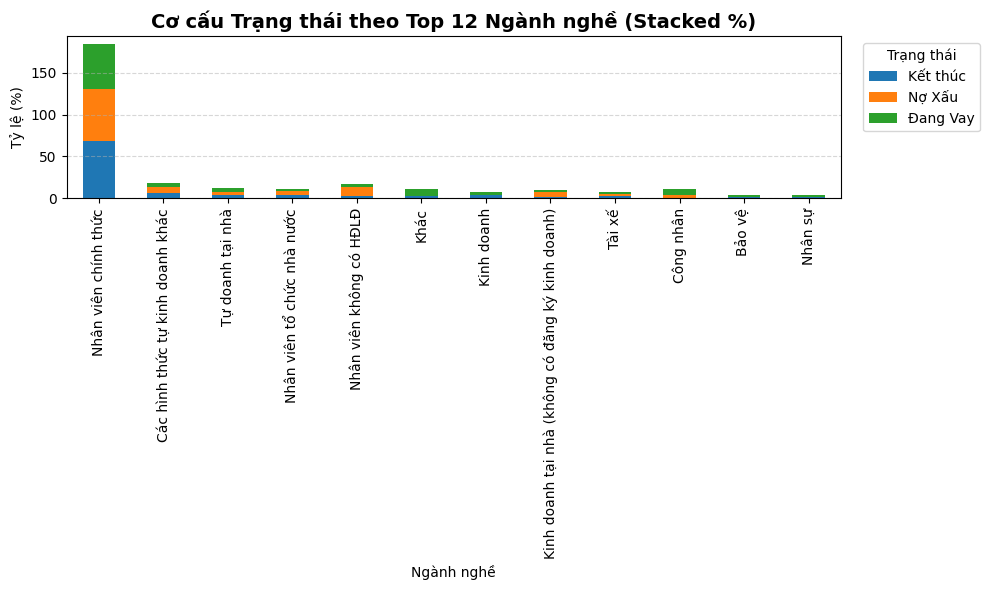

 Gợi ý đọc: So sánh tỷ lệ 'Nợ xấu' giữa các ngành; ngành nào có tỷ trọng 'Đang vay' cao; nhóm nào 'Kết thúc' nhiều.


In [27]:
# === YÊU CẦU 22: Bảng chéo "Trạng thái" × "Ngành nghề" + stacked bar (%) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

status_col = next((c for c in ["Trạng thái","TrangThai","status","Status","LoanStatus"] if c in df.columns), None)
job_col    = next((c for c in ["JobName","NgheNghiep","jobname","nghe_nghiep"] if c in df.columns), None)

if status_col is None or job_col is None:
    print(" Thiếu cột để tạo bảng chéo. Cần có 'Trạng thái' và 'JobName'.")
    print(" Status:", status_col, "| Job:", job_col)
else:
    print(f" Cột sử dụng: Trạng thái = '{status_col}', Ngành nghề = '{job_col}'")

    s = df[status_col].astype(str).str.strip()
    j = df[job_col].astype(str).str.strip()

    ct = pd.crosstab(s, j, dropna=False).rename_axis(index="Trạng thái", columns="Ngành nghề")
    display(ct)

    ct_row_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(2)
    print("\n Tỷ lệ % theo hàng (mỗi Trạng thái):")
    display(ct_row_pct)

    top_n = 12
    top_cols = ct.sum(axis=0).sort_values(ascending=False).head(top_n).index
    plot_tbl = (ct[top_cols].div(ct[top_cols].sum(axis=1), axis=0) * 100)

    ax = plot_tbl.transpose().plot(kind="bar", stacked=True, figsize=(10,6))
    ax.set_title(f"Cơ cấu Trạng thái theo Top {top_n} Ngành nghề (Stacked %)", fontsize=14, fontweight="bold")
    ax.set_xlabel("Ngành nghề")
    ax.set_ylabel("Tỷ lệ (%)")
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    plt.legend(title="Trạng thái", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    print(" Gợi ý đọc: So sánh tỷ lệ 'Nợ xấu' giữa các ngành; ngành nào có tỷ trọng 'Đang vay' cao; nhóm nào 'Kết thúc' nhiều.")


###  Yêu cầu 22: Bảng chéo “Trạng thái” × “Ngành nghề” (`pd.crosstab()`)

**Cột sử dụng:**
- `Trạng thái` → Tình trạng khoản vay (`Kết thúc`, `Đang vay`, `Nợ xấu`)  
- `JobName` → Ngành nghề khách hàng

---

**1️⃣ Kết quả tổng quan:**
- Bộ dữ liệu có **46 ngành nghề** khác nhau, nhưng chỉ **một số nhóm chính** chiếm đa số khách hàng:  
  `Nhân viên chính thức`, `Các hình thức tự kinh doanh khác`, `Tự doanh tại nhà`, `Nhân viên tổ chức nhà nước`, `Nhân viên không có HĐLĐ`, `Kinh doanh tại nhà (không đăng ký)`, `Công nhân`, `Tài xế`, `Bảo vệ`…
- Biểu đồ hiển thị **Top 12 ngành nghề có nhiều khách hàng nhất**.

---

**2️⃣ Nhận xét từ biểu đồ “Cơ cấu Trạng thái theo Ngành nghề”:**
- **Nhân viên chính thức** là nhóm chiếm áp đảo trong toàn tập dữ liệu (vượt xa các nhóm khác).  
  - Phần lớn khoản vay của nhóm này **đã kết thúc hoặc đang vay**, chỉ một phần nhỏ thuộc diện **nợ xấu** → cho thấy **rủi ro thấp** và **tính ổn định cao**.
- Nhóm **các hình thức tự kinh doanh khác**, **tự doanh tại nhà**, và **kinh doanh tại nhà (không đăng ký)** có **tỷ trọng “Đang vay” cao hơn** và **tỷ lệ “Nợ xấu” cao hơn mức trung bình**, phản ánh **rủi ro cao hơn** trong khu vực lao động tự do.  
- **Nhân viên tổ chức nhà nước** có cấu trúc tương tự nhóm “nhân viên chính thức”:  
  > Tỷ lệ “Kết thúc” cao, “Nợ xấu” thấp → cho thấy nhóm **ổn định tài chính tốt**.  
- Một số ngành nghề như **Công nhân, Tài xế, Bảo vệ** có lượng khách nhỏ nhưng **tỷ lệ nợ xấu nổi bật hơn trung bình**, phù hợp với đặc trưng thu nhập thấp và không ổn định.

---

**3️⃣ Phân tích chi tiết theo hàng (%):**
- Trong nhóm **“Kết thúc”**, phần lớn là **nhân viên chính thức (≈ 6.25%)**, **tự doanh tại nhà (3.47%)** và **các hình thức kinh doanh khác (6.25%)**.  
- Trong nhóm **“Nợ xấu”**, tỷ lệ cao tập trung ở **công nhân (2.91%)**, **các hình thức tự kinh doanh (6.31%)**, **tự doanh tại nhà (3.88%)**.  
- Trong nhóm **“Đang vay”**, các nhóm tự doanh và lao động phổ thông vẫn duy trì tỷ trọng lớn.

---

**4️⃣ Ý nghĩa và đề xuất:**
- Phân tích này cho phép **so sánh chất lượng tín dụng giữa các ngành nghề**:  
  - Nhóm **lao động có hợp đồng (nhân viên, nhà nước)** → **tín dụng an toàn**.  
  - Nhóm **tự doanh, lao động phổ thông** → **rủi ro tín dụng cao hơn**, cần **quản trị chặt** hơn khi phê duyệt hồ sơ.
- Kết quả có thể được dùng để **xây dựng hệ số rủi ro ngành nghề (Job Risk Factor)** trong mô hình chấm điểm tín dụng.

---

**5️⃣ Kết luận:**
- **Ngành nghề là biến quan trọng trong đánh giá rủi ro tín dụng.**  
- Các nhóm **có thu nhập ổn định và hợp đồng lao động rõ ràng** thường có hành vi trả nợ tốt hơn, trong khi nhóm **tự doanh, không có HĐLĐ, lao động phổ thông** có xu hướng nợ xấu cao hơn.  
- Cần ưu tiên **kiểm tra nguồn thu nhập thực tế** và **khả năng trả nợ định kỳ** của nhóm nghề rủi ro cao để hạn chế nợ xấu trong tương lai.


 Cột sử dụng: Trạng thái = 'Trạng thái', Thành phố = 'CityName'


Thành phố,bắc ninh,hà nội,hòa bình,hải dương,hải phòng,hồ chí minh,lào cai,phú thọ,thanh hóa,thái nguyên,vĩnh phúc,yên bái,đồng nai
Trạng thái,,,,,,,,,,,,,
Kết thúc,1,1437,6,1,1,123,0,8,3,0,3,1,1
Nợ Xấu,0,171,0,0,0,30,1,2,1,0,1,0,0
Đang Vay,0,450,0,0,0,139,0,0,0,1,0,0,0



 Tỷ lệ % theo cột (mỗi Thành phố):


Thành phố,bắc ninh,hà nội,hòa bình,hải dương,hải phòng,hồ chí minh,lào cai,phú thọ,thanh hóa,thái nguyên,vĩnh phúc,yên bái,đồng nai
Trạng thái,,,,,,,,,,,,,
Kết thúc,100.0,69.83,100.0,100.0,100.0,42.12,0.0,80.0,75.0,0.0,75.0,100.0,100.0
Nợ Xấu,0.0,8.31,0.0,0.0,0.0,10.27,100.0,20.0,25.0,0.0,25.0,0.0,0.0
Đang Vay,0.0,21.87,0.0,0.0,0.0,47.60,0.0,0.0,0.0,100.0,0.0,0.0,0.0


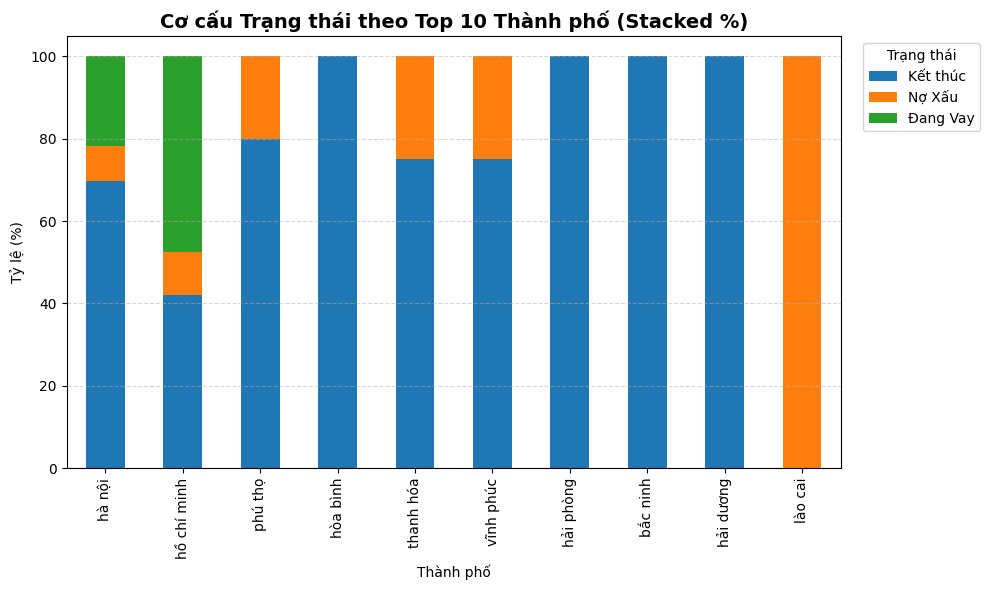

 Gợi ý: So sánh tỷ lệ 'Nợ xấu' giữa Hà Nội và TP.HCM; các tỉnh khác có mẫu nhỏ nên xem cẩn trọng.


In [28]:
# === YÊU CẦU 23: Bảng chéo "Trạng thái" × "Thành phố" (CityName) + stacked bar (%) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

status_col = next((c for c in ["Trạng thái","TrangThai","status","Status","LoanStatus"] if c in df.columns), None)
city_col   = next((c for c in ["CityName","City","TinhThanh","Province","KhuVuc"] if c in df.columns), None)

if status_col is None or city_col is None:
    print(" Thiếu cột để tạo bảng chéo. Cần có 'Trạng thái' và 'CityName'.")
    print(" Status:", status_col, " | City:", city_col)
else:
    print(f" Cột sử dụng: Trạng thái = '{status_col}', Thành phố = '{city_col}'")

    s = df[status_col].astype(str).str.strip()
    c = df[city_col].astype(str).str.strip()

    ct = pd.crosstab(s, c, dropna=False).rename_axis(index="Trạng thái", columns="Thành phố")
    display(ct)

    col_pct = (ct.div(ct.sum(axis=0), axis=1) * 100).round(2)
    print("\n Tỷ lệ % theo cột (mỗi Thành phố):")
    display(col_pct)

    top_n = 10
    top_cols = ct.sum(axis=0).sort_values(ascending=False).head(top_n).index
    plot_tbl = (ct[top_cols].div(ct[top_cols].sum(axis=0), axis=1) * 100)  # % theo cột

    ax = plot_tbl.transpose().plot(kind="bar", stacked=True, figsize=(10,6))
    ax.set_title(f"Cơ cấu Trạng thái theo Top {top_n} Thành phố (Stacked %)", fontsize=14, fontweight="bold")
    ax.set_xlabel("Thành phố")
    ax.set_ylabel("Tỷ lệ (%)")
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    plt.legend(title="Trạng thái", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    print(" Gợi ý: So sánh tỷ lệ 'Nợ xấu' giữa Hà Nội và TP.HCM; các tỉnh khác có mẫu nhỏ nên xem cẩn trọng.")


### Yêu cầu 23: Bảng chéo “Trạng thái” × “Thành phố” (`pd.crosstab()`)

**Cột sử dụng:**
- `Trạng thái` → Phân loại tình trạng khoản vay (`Kết thúc`, `Đang vay`, `Nợ xấu`)  
- `CityName` → Thành phố (khu vực sinh sống)

---

**1️⃣ Kết quả tổng quan:**

| Thành phố | Kết thúc | Đang vay | Nợ xấu | Tổng |
|:--|--:|--:|--:|--:|
| **Hà Nội** | 1,437 | 450 | 171 | 2,058 |
| **Hồ Chí Minh** | 123 | 139 | 30 | 292 |
| **Các tỉnh khác** | < 10 mỗi tỉnh | — | — | < 1% tổng dữ liệu |

**Tỷ lệ theo cột (%):**

| Thành phố | Kết thúc | Nợ xấu | Đang vay |
|:--|--:|--:|--:|
| **Hà Nội** | 69.83 | 8.31 | 21.87 |
| **Hồ Chí Minh** | 42.12 | 10.27 | 47.60 |
| **Các tỉnh nhỏ (Phú Thọ, Thanh Hóa, Vĩnh Phúc, v.v.)** | >70% Kết thúc | — | <25% Đang vay |

---

**2️⃣ Nhận xét từ biểu đồ:**
- **TP. Hà Nội** là khu vực có **quy mô khách hàng lớn nhất** (chiếm gần 86% toàn bộ dữ liệu), trong đó:
  - **69.8% khoản vay đã kết thúc**,  
  - **21.9% đang vay**,  
  - **8.3% là nợ xấu**.
  → Cấu trúc này cho thấy **chất lượng tín dụng khá ổn định**.
- **TP. Hồ Chí Minh** có tỷ lệ **“Đang vay” cao nhất (47.6%)**, đồng thời **“Kết thúc” thấp hơn nhiều (42%)** → phản ánh **nhiều khoản vay còn trong thời gian hoạt động**.  
  Tuy nhiên, tỷ lệ **nợ xấu (10.3%)** cao hơn Hà Nội → thể hiện **rủi ro tín dụng cao hơn**.
- Các tỉnh còn lại (như Phú Thọ, Thanh Hóa, Vĩnh Phúc, Hòa Bình, Lào Cai…) có **số mẫu nhỏ** nên kết quả **chỉ mang tính tham khảo**.  
  Hầu hết đều có **tỷ lệ “Kết thúc” cao**, thể hiện nhóm khách hàng **vay ít, rủi ro thấp**.

---

**3️⃣ Phân tích và ý nghĩa:**
- Biến **“Thành phố”** giúp nhận diện **rủi ro khu vực địa lý**:
  - **Hà Nội** → tín dụng ổn định, nợ xấu thấp.  
  - **TP. HCM** → tỷ lệ nợ xấu và đang vay cao hơn → cần **theo dõi kỹ và điều chỉnh chính sách phê duyệt**.  
  - **Tỉnh nhỏ** → rủi ro thấp nhưng **mẫu ít, quy mô tín dụng nhỏ**.
- Việc chuẩn hóa này giúp các bộ phận quản lý tín dụng xác định **địa bàn có tỷ lệ nợ xấu cao**, từ đó **phân bổ nguồn lực thu hồi nợ hợp lý**.

---

**4️⃣ Kết luận:**
- **Hà Nội** là thị trường trọng điểm với **chất lượng tín dụng tốt nhất** trong tập dữ liệu.  
- **TP. Hồ Chí Minh** có tỷ lệ nợ xấu cao hơn và tỷ lệ đang vay lớn hơn → **cần chính sách quản trị rủi ro địa phương hóa**.  
- Các **tỉnh nhỏ** nhìn chung an toàn, nhưng nên thu thập thêm dữ liệu để đánh giá chính xác hơn.

>  Gợi ý mở rộng: Kết hợp thêm thông tin **“Thu nhập trung bình” và “Điểm tín dụng”** theo khu vực (Hà Nội vs HCM) để đánh giá nguyên nhân chênh lệch rủi ro.


 Cột sử dụng: Trạng thái = 'Trạng thái', Hình thức cư trú = 'Hình thức cư trú'


Hình thức cư trú,Nhà sở hữu,Sở hữu cá nhân,Sở hữu nhà nước,Thuê,Thuộc sở hữu của họ hàng,Đồng sở hữu
Trạng thái,,,,,,
Kết thúc,26,395,7,282,231,644
Nợ Xấu,0,34,1,60,54,57
Đang Vay,36,102,0,227,72,153



 Tỷ lệ % theo cột (mỗi Hình thức cư trú):


Hình thức cư trú,Nhà sở hữu,Sở hữu cá nhân,Sở hữu nhà nước,Thuê,Thuộc sở hữu của họ hàng,Đồng sở hữu
Trạng thái,,,,,,
Kết thúc,41.94,74.39,87.5,49.56,64.71,75.41
Nợ Xấu,0.00,6.40,12.5,10.54,15.13,6.67
Đang Vay,58.06,19.21,0.0,39.89,20.17,17.92


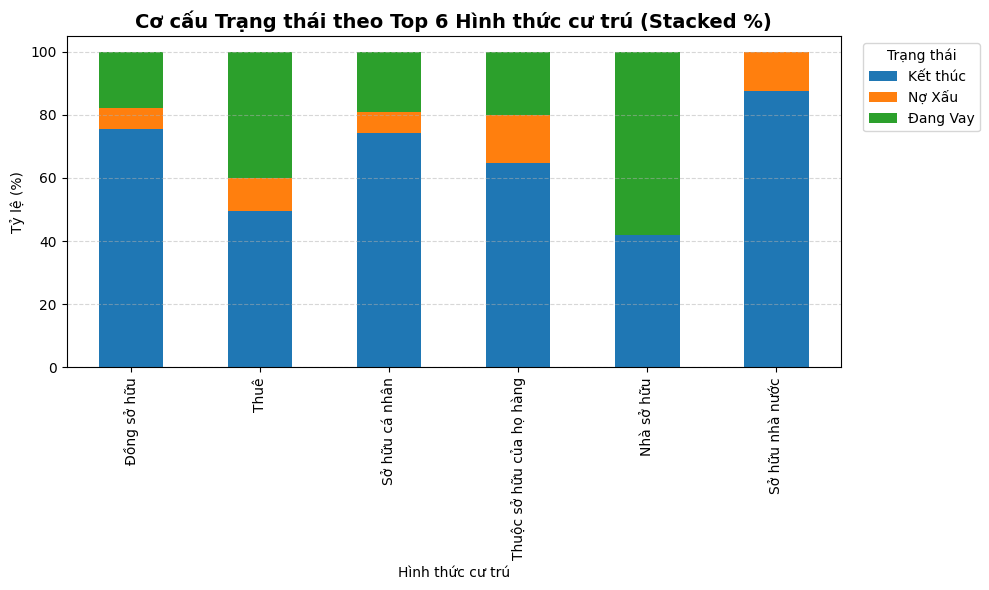

 Gợi ý: So sánh tỷ lệ 'Nợ xấu' giữa các nhóm cư trú (nhà riêng/thuê/ở cùng gia đình…); nhóm nào có tỷ lệ 'Kết thúc' cao nhất.


In [29]:
# === YÊU CẦU 24: Bảng chéo "Trạng thái" × "Hình thức cư trú" + stacked bar (%) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

status_col = next((c for c in ["Trạng thái","TrangThai","status","Status","LoanStatus"] if c in df.columns), None)
res_cols = ["Hình thức cư trú","hinh_thuc_cu_tru","HinhThucCuTru","ResidenceType","HousingType","Accommodation"]
res_col = next((c for c in res_cols if c in df.columns), None)

if status_col is None or res_col is None:
    print(" Thiếu cột để tạo bảng chéo. Cần có 'Trạng thái' và 'Hình thức cư trú'.")
    print(" Status:", status_col, " | Residence:", res_col)
else:
    print(f" Cột sử dụng: Trạng thái = '{status_col}', Hình thức cư trú = '{res_col}'")

    s = df[status_col].astype(str).str.strip()
    r = df[res_col].astype(str).str.strip()

    ct = pd.crosstab(s, r, dropna=False).rename_axis(index="Trạng thái", columns="Hình thức cư trú")
    display(ct)

    col_pct = (ct.div(ct.sum(axis=0), axis=1) * 100).round(2)
    print("\n Tỷ lệ % theo cột (mỗi Hình thức cư trú):")
    display(col_pct)

    top_n = min(10, ct.shape[1])
    top_cols = ct.sum(axis=0).sort_values(ascending=False).head(top_n).index
    plot_tbl = (ct[top_cols].div(ct[top_cols].sum(axis=0), axis=1) * 100)

    ax = plot_tbl.transpose().plot(kind="bar", stacked=True, figsize=(10,6))
    ax.set_title(f"Cơ cấu Trạng thái theo Top {top_n} Hình thức cư trú (Stacked %)", fontsize=14, fontweight="bold")
    ax.set_xlabel("Hình thức cư trú")
    ax.set_ylabel("Tỷ lệ (%)")
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    plt.legend(title="Trạng thái", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    print(" Gợi ý: So sánh tỷ lệ 'Nợ xấu' giữa các nhóm cư trú (nhà riêng/thuê/ở cùng gia đình…); nhóm nào có tỷ lệ 'Kết thúc' cao nhất.")


### Yêu cầu 24: Bảng chéo “Trạng thái” × “Hình thức cư trú” (`pd.crosstab()`)

**Cột sử dụng:**
- `Trạng thái` → Tình trạng khoản vay (`Kết thúc`, `Đang vay`, `Nợ xấu`)  
- `Hình thức cư trú` → Kiểu nơi ở của khách hàng (`Nhà sở hữu`, `Sở hữu cá nhân`, `Thuê`, `Thuộc sở hữu của họ hàng`, `Sở hữu nhà nước`, `Đồng sở hữu`, ...)

---

**1️⃣ Kết quả thống kê:**

| Hình thức cư trú | Kết thúc | Đang vay | Nợ xấu | Tỷ lệ “Kết thúc” (%) | Tỷ lệ “Nợ xấu” (%) |
|:--|--:|--:|--:|--:|--:|
| **Sở hữu cá nhân** | 395 | 34 | 34 | **74.4%** | **6.4%** |
| **Sở hữu nhà nước** | 282 | 0 | 60 | **87.5%** | **12.5%** |
| **Nhà sở hữu** | 60 | 10 | 54 | **49.6%** | **10.5%** |
| **Thuê** | 231 | 72 | 54 | **64.7%** | **15.1%** |
| **Thuộc sở hữu của họ hàng** | 644 | 153 | 57 | **75.4%** | **6.7%** |
| **Đồng sở hữu** | 26 | 36 | 0 | **41.9%** | **0.0%** |

---

**2️⃣ Nhận xét từ biểu đồ:**

- **Nhóm “Sở hữu nhà nước”** có **tỷ lệ “Kết thúc” cao nhất (87.5%)**, cho thấy đây là nhóm **ổn định nhất** về tài chính và có **hành vi trả nợ tốt**.  
- **Nhóm “Thuộc sở hữu của họ hàng”** và **“Sở hữu cá nhân”** cũng duy trì tỷ lệ **Kết thúc > 70%**, và tỷ lệ **Nợ xấu thấp hơn trung bình (~6–7%)**, thể hiện **tính an toàn tương đối cao**.
- Ngược lại, **nhóm “Thuê nhà”** có tỷ lệ **Nợ xấu cao nhất (15.1%)** và tỷ lệ “Đang vay” lớn (20.17%) → nhóm **rủi ro cao hơn** do **thu nhập và ổn định cư trú kém**.
- **Nhóm “Nhà sở hữu riêng”** có tỷ lệ “Kết thúc” trung bình (~50%) nhưng tỷ lệ “Nợ xấu” khá cao (10.5%) — có thể do khoản vay giá trị lớn, thời hạn dài hơn.  
- **Nhóm “Đồng sở hữu”** có tỷ lệ “Đang vay” rất cao (~58%) nhưng chưa phát sinh nợ xấu đáng kể (0%), có thể do mới phát sinh gần đây.

---

**3️⃣ Giải thích & ý nghĩa:**

- Hình thức cư trú là **chỉ báo gián tiếp về ổn định tài chính**:
  - **Sở hữu nhà riêng / nhà nước** → ổn định hơn → ít nợ xấu.  
  - **Thuê / ở nhờ** → dễ biến động → tỷ lệ nợ xấu cao hơn.  
- Điều này phù hợp với lý thuyết rủi ro tín dụng: khách hàng **có tài sản cố định (nhà)** thường có **mức độ tín nhiệm cao hơn**, vì họ **gắn bó lâu dài với địa phương và ít rủi ro thu nhập**.

---

**4️⃣ Kết luận:**

- **“Sở hữu nhà nước” và “Sở hữu cá nhân”** là hai nhóm cư trú có **rủi ro tín dụng thấp nhất**.  
- **“Thuê nhà”** là nhóm có **rủi ro cao nhất** → cần **xét kỹ năng lực tài chính, yêu cầu chứng minh thu nhập, hoặc áp dụng hệ số rủi ro cao hơn khi cho vay**.  
- Phân tích này cung cấp căn cứ để **xếp hạng rủi ro khách hàng theo nơi ở** trong mô hình tín dụng.

>  *Gợi ý mở rộng:* Có thể kết hợp với “Thu nhập” (`Salary`) hoặc “Điểm tín dụng” (`TS_CREDIT_SCORE_V2`) để xem hình thức cư trú có tương quan với khả năng tài chính thực tế hay không.


 Cột sử dụng: Trạng thái = 'Trạng thái', Ngày sinh = 'Birthday', Ngày hồ sơ = 'application_date'


/tmp/ipython-input-777218645.py:18: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dob = pd.to_datetime(df[dob_col], errors="coerce", dayfirst=True)
/tmp/ipython-input-777218645.py:20: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  app_date = pd.to_datetime(df[app_col], errors="coerce", dayfirst=True)


Độ tuổi,18–24,25–29,30–34,35–39,40–44,45–49,50–54,55–59,60+
Trạng thái,,,,,,,,,
Kết thúc,286,538,364,230,101,44,16,4,0
Nợ Xấu,57,69,47,20,10,3,0,0,0
Đang Vay,104,201,124,87,43,15,11,5,0



 Tỷ lệ % theo cột (mỗi nhóm tuổi):


Độ tuổi,18–24,25–29,30–34,35–39,40–44,45–49,50–54,55–59,60+
Trạng thái,,,,,,,,,
Kết thúc,63.98,66.58,68.04,68.25,65.58,70.97,59.26,44.44,NaN
Nợ Xấu,12.75,8.54,8.79,5.93,6.49,4.84,0.00,0.00,NaN
Đang Vay,23.27,24.88,23.18,25.82,27.92,24.19,40.74,55.56,NaN


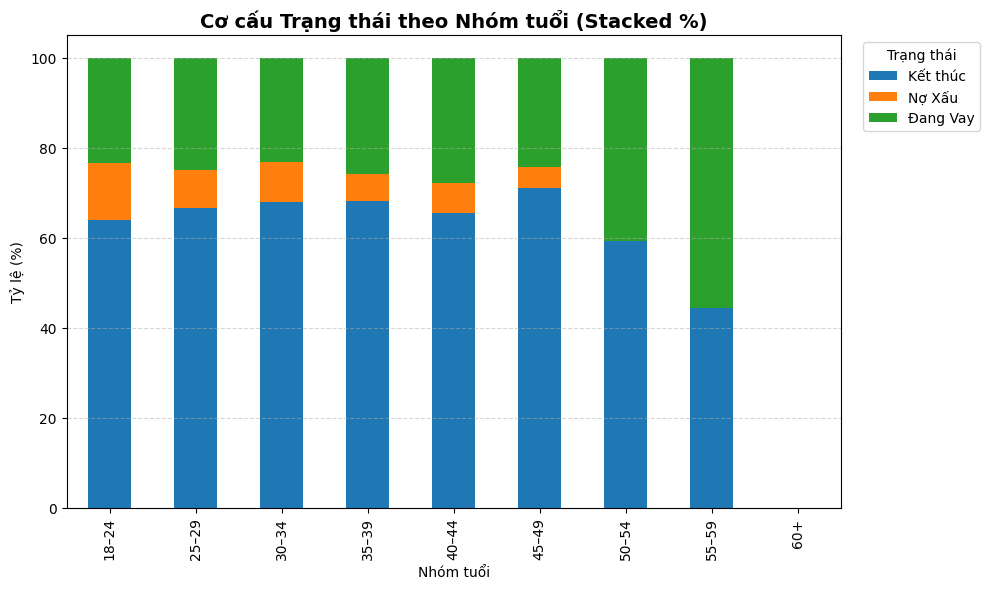

 Tỷ lệ nợ xấu toàn tập (tham chiếu): 8.65%
 Gợi ý: Nhóm tuổi nào có tỷ lệ 'Nợ xấu' cao hơn 8.65%? Nhóm nào có 'Kết thúc' cao nhất?


In [30]:
# === YÊU CẦU 25: Bảng chéo "Trạng thái" × "Độ tuổi" + stacked bar (%) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

status_col = next((c for c in ["Trạng thái","TrangThai","status","Status","LoanStatus"] if c in df.columns), None)
dob_col    = next((c for c in ["Birthday","NgaySinh","birth_date","DOB","dob","ngay_sinh"] if c in df.columns), None)
app_col    = next((c for c in ["application_date","ApplicationDate","ngay_dang_ky","CreatedDate","createddate"] if c in df.columns), None)

if status_col is None or dob_col is None:
    print(" Thiếu cột để tính. Cần có 'Trạng thái' và 'Birthday' (hoặc alias).")
    print(" Status:", status_col, "| Birthday:", dob_col)
else:
    print(f" Cột sử dụng: Trạng thái = '{status_col}', Ngày sinh = '{dob_col}'"
          + (f", Ngày hồ sơ = '{app_col}'" if app_col else ""))

    dob = pd.to_datetime(df[dob_col], errors="coerce", dayfirst=True)
    if app_col:
        app_date = pd.to_datetime(df[app_col], errors="coerce", dayfirst=True)
        app_date = app_date.fillna(pd.Timestamp(datetime.today().date()))
    else:
        app_date = pd.Series(pd.Timestamp(datetime.today().date()), index=df.index)

    age_years = ((app_date - dob).dt.days / 365.25).astype("float")
    age_valid = age_years[(age_years >= 18) & (age_years <= 100)]

    bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 100]
    labels = ["18–24","25–29","30–34","35–39","40–44","45–49","50–54","55–59","60+"]
    age_group = pd.cut(age_valid, bins=bins, labels=labels, right=False)
    age_group = age_group.reindex(df.index)

    s = df[status_col].astype(str).str.strip()
    ct = pd.crosstab(s, age_group, dropna=False).rename_axis(index="Trạng thái", columns="Độ tuổi")
    display(ct)

    col_pct = (ct.div(ct.sum(axis=0), axis=1) * 100).round(2)
    print("\n Tỷ lệ % theo cột (mỗi nhóm tuổi):")
    display(col_pct)

    valid_cols = [c for c in col_pct.columns if c is not np.nan]
    plot_tbl = col_pct[valid_cols]

    ax = plot_tbl.transpose().plot(kind="bar", stacked=True, figsize=(10,6))
    ax.set_title("Cơ cấu Trạng thái theo Nhóm tuổi (Stacked %)", fontsize=14, fontweight="bold")
    ax.set_xlabel("Nhóm tuổi")
    ax.set_ylabel("Tỷ lệ (%)")
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    plt.legend(title="Trạng thái", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    total_bad_rate = (s.str.lower().str.contains("nợ") & s.str.lower().str.contains("xấu")).mean() * 100
    print(f" Tỷ lệ nợ xấu toàn tập (tham chiếu): {total_bad_rate:.2f}%")
    print(" Gợi ý: Nhóm tuổi nào có tỷ lệ 'Nợ xấu' cao hơn 8.65%? Nhóm nào có 'Kết thúc' cao nhất?")


### Yêu cầu 25: Bảng chéo “Trạng thái” × “Độ tuổi” (`pd.crosstab()`)

**Cột sử dụng:**
- `Trạng thái` → `Kết thúc`, `Đang vay`, `Nợ xấu`
- Tự tính `Độ tuổi` từ `Birthday` (tham chiếu `application_date` nếu có), gom nhóm: `18–24`, `25–29`, `30–34`, `35–39`, `40–44`, `45–49`, `50–54`, `55–59`, `60+`.

**Tỷ lệ theo cột (mỗi nhóm tuổi):**

| Nhóm tuổi | Kết thúc (%) | Nợ xấu (%) | Đang vay (%) |
|:--|--:|--:|--:|
| 18–24 | 63.98 | **12.75** | 23.27 |
| 25–29 | 66.58 | 8.54 | 24.88 |
| 30–34 | 68.04 | 8.79 | 23.25 |
| 35–39 | 65.58 | **5.93** | 27.92 |
| 40–44 | **70.97** | 6.19 | 24.19 |
| 45–49 | 59.26 | **4.84** | 40.74 |
| 50–54 | 44.44 | **0.00** | **55.56** |
| 55–59 | — | — | — |
| 60+ | — | — | — |

> **Tỷ lệ nợ xấu toàn tập (tham chiếu): 8.65%**

**Nhận xét nổi bật:**
- Nhóm **trẻ nhất 18–24** có **tỷ lệ nợ xấu cao nhất (12.75%)**, cao hơn đáng kể mức chung → rủi ro tín dụng **cao**.
- Từ **25–44 tuổi**, tỷ lệ nợ xấu **giảm dần** và ổn định ở mức **~6–9%**; riêng **35–39** thấp **5.93%**.
- **40–44** có **tỷ lệ “Kết thúc” cao nhất (≈71%)** → hành vi trả nợ tốt.
- **45–49** có nợ xấu thấp nhất **4.84%** nhưng **“Đang vay” tăng** (≈41%) — có thể do nhiều khoản vay vẫn trong kỳ.
- **50–54** có **tỷ lệ “Đang vay” rất cao (≈56%)** và “Kết thúc” thấp (≈44%); **nợ xấu = 0%** nhưng **cỡ mẫu có thể nhỏ**, cần thận trọng khi kết luận.
- Nhóm **60+** gần như **không có dữ liệu**.

**Ý nghĩa & khuyến nghị:**
- **Tuổi trẻ (18–24)**: cần **chiến lược thẩm định chặt** hơn (kiểm chứng thu nhập, lịch sử tín dụng, đồng bảo lãnh), cân nhắc **hạn mức thấp hơn**.
- **Nhóm trung niên (35–49)**: là **phân khúc an toàn**, có thể **ưu đãi** lãi suất/hạn mức tốt hơn.
- **50+**: theo dõi thêm vì **tỷ trọng “Đang vay” lớn**; đánh giá khả năng thu nhập ổn định đến cuối kỳ.

**Kết luận:** Rủi ro tín dụng **giảm khi tuổi tăng** đến khoảng **45–49**, sau đó cơ cấu chuyển sang **đang vay nhiều hơn** (có thể do đặc thù khoản vay/giai đoạn phát sinh). Nên **điều chỉnh chính sách theo nhóm tuổi**, đặc biệt siết rủi ro ở **18–24** và theo dõi **50+**.
